# <center> <b> Analisis Marketing Bank untuk Memprediksi klient yang akan Subscribe Deposit Berjangka<br>
    


Nama: DESTI RATNA KOMALA

Batch : FTDS-020-RMT

Dataset : `Bank Customer Data in VietNam`

HuggingFace: [`Bank-Marketing-Term-Deposit-prediction`](https://huggingface.co/spaces/destiratnakomala/Bank-Marketing-Term-Deposit)

Model 2: [Model Neural Network](https://github.com/destiratnakomala/Final-Project-FTDS-020/blob/main/Bank-Marketing-Term-Deposit/02_sub_desti_ratna_komala.ipynb)

## 1 - Introduction

### Objective




Sebuah bank di VietNam ingin memaksimalkan biaya pemasaran untuk produk deposito berjangka. Namun, pihak bank kesulitan dalam menentukan klien mana yang akan berlangganan pada produk tersebut. Oleh karena itu, dibutuhkan pemodelan untuk mengindentifikasi hal tersebut berdasarkan perilaku dan informasi data diri masing-masing pelanggan agar upaya pemasaran dapat lebih terarah dan efisien.

### *Dataset* Information

Dataset ini merupakan pemasaran yang dilakukan secara langsung via telepon (phone calls) oleh Bank VietNam, terdiri dari 42639 baris dan 16 kolom. Fitur target (term_deposit) menunjukkan apakah seorang klien akan berlangganan pada produk deposito berjangka atau tidak. Fitur target tersebut bernilai **0 : tidak berlangganan (not_subscribe)** dan **1 : berlangganan (subscribe)**.

Berikut adalah deskripsi dari masing-masing fitur pada dataset `Bank Customer in VietNam`

|Feature|Deskripsi|
|------|-------|
|ID|Nomor id client bank|
|age|Usia client bank|
|job|Jenis pekerjaan client bank|
|marital|status pernikahan client bank|
|education|tingkat pendidikan client bank||
|default|status apakah client bank pernah gagal bayar (default) kartu kredit?||
|housing|status apakah client bank mempunyai cicilan rumah?||
|loan|status apakah client bank mempunyai hutang pribadi?||
|balance|Jumlah saldo yang dimiliki client bank||
|month|Bulan terakhir client bank dihubungi|
|day|hari terakhir client bank dihubungi|
|duration|durasi kontak terakhir bank terhadap client|
|campaign| jumlah kontak yang telah dilakukan selama melakukan kampanye marketing|
|pdays|jumlah hari kontak terakhir setelah client dihubungi oleh tim marketing bank
|previous|jumlah kontak yang dilakukan sebelum tim marketing bank menghubungi client ini
|term_deposit|Status apakah client akan berlangganan tabungan berjangka (term_deposit) atau tidak?



Sehingga, dapat dikategorikan manjadi:

- **Data Klien Bank**

         'ID', 'age', 'marital', 'education', 'job', 'default', 'housing', 'loan', 'balance'


- **Kontak terakhir klien terhadap tim pemasaran**

       'day','month','duration','pdays', 'previous', 'campaign'



- **Status Deposito Berjangka**
        'term_deposit'




## 2 - Import Libraries

Berikut adalah keseluruhan libraries yang digunakan pada analisis ini.Libraries ini dimaksudkan untuk mengimport data, cleaning data, analisis, data, visualisasi data, dan pembuatan model hingga pengujian model.

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, feature-engine, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip install protobuf==3.19.4

In [ ]:
!pip show protobuf

Name: protobuf
Version: 3.19.4
Summary: Protocol Buffers
Home-page: https://developers.google.com/protocol-buffers/
Author: 
Author-email: 
License: 3-Clause BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: google-api-core, google-cloud-bigquery, google-cloud-bigquery-connection, google-cloud-bigquery-storage, google-cloud-datastore, google-cloud-firestore, google-cloud-functions, google-cloud-language, google-cloud-translate, googleapis-common-protos, grpc-google-iam-v1, grpcio-status, orbax-checkpoint, proto-plus, tensorboard, tensorflow, tensorflow-datasets, tensorflow-gpu, tensorflow-hub, tensorflow-metadata


In [ ]:
!pip install tensorflow-gpu==2.3

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.3 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.3


In [ ]:
pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [ ]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"]="python"

In [ ]:
!pip install feature_engine
!pip install xgboost
!pip install catboost
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#undersampling
from sklearn.utils import resample

# model_selection
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Library handling outlier
from feature_engine.outliers import Winsorizer

# Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Library Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Library feature scaling dan feature encoding
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,MinMaxScaler, LabelEncoder

#import Algoritma pemodelan
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#import SVC dan SVR
from sklearn.svm import SVC, SVR

# Library pemodelan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, concatenate, BatchNormalization, Dropout, Activation


# Library Evaluasi Model
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, f1_score

# Library Saving Model
import pickle
import joblib

#tampilkan seluruh kolom pada data
pd.set_option('display.max_columns', None)

## 3 - Data Loading

Dataset yang digunakan berasal dari `Kaggle: Bank Customer Data in VietNam` dengan file [`customer deposit`](https://www.kaggle.com/datasets/tomculihiddleston/bank-customer-data-in-vietnam).
Selanjutnya, upload data raw csv ke akun github dan panggil path data raw tersebut pada [BankCustomerData.csv](https://raw.githubusercontent.com/destiratnakomala/Final-Project-FTDS-020/main/Bank-Marketing-Term-Deposit/BankCustomerData.csv). Variabel baru `df2` dibuat untuk meng-import dataset bertipe `.csv` tersebut

In [ ]:
#copy dataset
df2=pd.read_csv('https://raw.githubusercontent.com/destiratnakomala/Final-Project-FTDS-020/main/Bank-Marketing-Term-Deposit/BankCustomerData.csv')

In [ ]:
#copy data awal
df=df2.copy()

Data loading akan dibagi menjadi 2, pre-undersampling dan post-undersampling. Hal ini dikarenakan data target pada dataset memiliki nilai yang imbalanced, sehingga dilakukan handle balancing data agar [peformasi](https://towardsdatascience.com/why-we-need-to-deal-with-imbalanced-classes-ec0dc1a7b803) hasil prediksi pemodelan dapat lebih akurat dan tidak didominasi oleh data mayoritas.

### 3-1 Pre- Undersampling

In [ ]:
#tampilkan 10 data awal
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,1,58,management,2,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,2,44,technician,1,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,3,33,entrepreneur,2,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,4,47,blue-collar,2,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,5,33,unknown,1,unknown,0,1,0,0,5,may,198,1,-1,0,0
5,6,35,management,2,tertiary,0,231,1,0,5,may,139,1,-1,0,0
6,7,28,management,1,tertiary,0,447,1,1,5,may,217,1,-1,0,0
7,8,42,entrepreneur,0,tertiary,1,2,1,0,5,may,380,1,-1,0,0
8,9,58,retired,2,primary,0,121,1,0,5,may,50,1,-1,0,0
9,10,43,technician,1,secondary,0,593,1,0,5,may,55,1,-1,0,0


In [ ]:
#tampilkan 10 data terakhir
df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
42629,42630,47,admin.,1,secondary,0,3696,0,0,12,jan,758,4,-1,0,1
42630,42631,30,technician,2,tertiary,0,2166,0,0,12,jan,316,2,-1,0,1
42631,42632,28,self-employed,1,tertiary,0,4579,0,0,12,jan,409,2,-1,0,1
42632,42633,29,blue-collar,1,secondary,0,180,0,0,12,jan,350,2,-1,0,0
42633,42634,49,management,2,tertiary,0,1093,1,1,12,jan,243,2,91,2,1
42634,42635,21,student,1,secondary,0,2488,0,0,12,jan,661,2,92,1,1
42635,42636,87,retired,2,primary,0,2190,0,0,12,jan,512,2,-1,0,1
42636,42637,34,blue-collar,2,primary,0,6718,0,0,13,jan,278,4,97,1,0
42637,42638,22,student,1,secondary,0,254,0,0,13,jan,143,2,-1,0,1
42638,42639,32,management,1,tertiary,0,1962,0,0,13,jan,130,1,-1,0,0


In [ ]:
#cek ukuran data
df.shape

(42639, 16)

In [ ]:
#cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            42639 non-null  int64 
 1   age           42639 non-null  int64 
 2   job           42639 non-null  object
 3   marital       42639 non-null  int64 
 4   education     42639 non-null  object
 5   default       42639 non-null  int64 
 6   balance       42639 non-null  int64 
 7   housing       42639 non-null  int64 
 8   loan          42639 non-null  int64 
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  term_deposit  42639 non-null  int64 
dtypes: int64(13), object(3)
memory usage: 5.2+ MB


In [ ]:
#Tampilkan data unik pada tiap kolom
df.nunique()

ID              42639
age                75
job                12
marital             3
education           4
default             2
balance          7078
housing             2
loan                2
day                31
month              12
duration         1561
campaign           48
pdays             418
previous           38
term_deposit        2
dtype: int64

In [ ]:
# menampilkan fitur pada df
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'term_deposit'],
      dtype='object')

In [ ]:
#tampilkan default unique
df['term_deposit'].unique()

array([0, 1])

In [ ]:
#tampilkan jumlah masing-masing nilai pada term_deposit
df['term_deposit'].value_counts()

0    38678
1     3961
Name: term_deposit, dtype: int64

In [ ]:
#cek apakah terdapat missing value
df.isnull().sum()

ID              0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

In [ ]:
#mengecek apakah terdapat data terduplikasi?
df.duplicated().sum()

0

---


***Notes Hasil Data Loading Pre-Undersampling:***
- Data ini memiliki 42639 baris dan 16 kolom
- Terdapat 8 kolom objek/kategorikal, 8 kolom numerik
- Data tidak memiliki data missing.
- Pada target (term_deposit), data imbalanced sangat eksrim yaitu pada not-subscribe (0) sebanyak 38678 baris dan subscribe(1) sebanyak 3961. Sehingga perlu dilakukan undersampling pada not-subscribe.


---



### 3-2 Undersampling

Dataset yang digunakan memiliki data besar yaitu sebanyak ~43000 baris. Ratio pada `term_deposit` antara **not subscribe** dan **subscribe** adalah sebesar 166:17 atau sekitar 10:1.

Jika dilakukan oversampling, 90% dari data **subscribe** akan termanipulasi atau sudah tidak asli lagi. Karena oversampling membuat data sintetis yang mengikuti pola dari dataset tersebut.

Sehingga, perlu dilakukan Undersampling agar keaslian data tetap terjaga. Karena undersampling bekerja dengan mengurangi jumlah data mayoritas (**not_subscribe**) yang dipilih secara acak (random) sesuai dengan jumlah baris pada data minoritas (**subscribe**).

In [ ]:
#pisahkan data minoritas dan mayoritas

not_subscribe = df[df.term_deposit==0]
subscribe = df[df.term_deposit==1]

# undersample data mayoritas
not_subscribe_unsampled = resample(not_subscribe,
                          replace=True, # sample with replacement
                          n_samples=len(subscribe), #samakan dengan jumlah minoritas
                          random_state=27)

#gabungkan undersample data dengan subscribe
df_unsampled = pd.concat([not_subscribe_unsampled, subscribe])

#cek jumlah data pada subscribe dan non-subscribe
df_unsampled.term_deposit.value_counts()

0    3961
1    3961
Name: term_deposit, dtype: int64

In [ ]:
#reset index data
dfs=df_unsampled.reset_index(drop=True)

In [ ]:
#simpan data post undersampling
dfs.to_csv('bank_marketing.csv',index_label=False)

In [ ]:
#panggil data post undersampling
dfs=pd.read_csv(r'/content/bank_marketing.csv')
df=dfs.copy()
df

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,5305,30,management,1,tertiary,0,1243,1,0,23,may,135,1,-1,0,0
1,39400,28,student,1,secondary,0,5916,0,0,22,may,259,1,63,5,0
2,15545,29,management,1,secondary,0,0,0,1,21,jul,463,2,-1,0,0
3,5000,32,technician,1,unknown,0,317,1,0,21,may,394,2,-1,0,0
4,31865,54,admin.,2,primary,0,546,1,0,9,apr,40,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,42632,28,self-employed,1,tertiary,0,4579,0,0,12,jan,409,2,-1,0,1
7918,42634,49,management,2,tertiary,0,1093,1,1,12,jan,243,2,91,2,1
7919,42635,21,student,1,secondary,0,2488,0,0,12,jan,661,2,92,1,1
7920,42636,87,retired,2,primary,0,2190,0,0,12,jan,512,2,-1,0,1


In [ ]:
#tampilkan 10 data awal
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,5305,30,management,1,tertiary,0,1243,1,0,23,may,135,1,-1,0,0
1,39400,28,student,1,secondary,0,5916,0,0,22,may,259,1,63,5,0
2,15545,29,management,1,secondary,0,0,0,1,21,jul,463,2,-1,0,0
3,5000,32,technician,1,unknown,0,317,1,0,21,may,394,2,-1,0,0
4,31865,54,admin.,2,primary,0,546,1,0,9,apr,40,1,-1,0,0
5,24805,34,blue-collar,2,secondary,0,559,1,0,18,nov,47,1,193,1,0
6,16623,50,blue-collar,2,primary,0,27,1,0,24,jul,142,1,-1,0,0
7,39840,36,admin.,1,secondary,0,119,0,0,2,jun,93,2,-1,0,0
8,26529,32,blue-collar,2,secondary,0,10142,1,0,20,nov,249,1,-1,0,0
9,28744,38,management,0,tertiary,0,441,1,0,30,jan,67,1,-1,0,0


In [ ]:
#tampilkan 10 data terakhir
df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
7912,42627,25,technician,1,secondary,0,4859,0,0,12,jan,227,1,-1,0,1
7913,42628,28,services,1,secondary,0,168,0,0,12,jan,387,1,194,1,1
7914,42629,25,blue-collar,1,secondary,0,2007,0,0,12,jan,265,2,-1,0,1
7915,42630,47,admin.,1,secondary,0,3696,0,0,12,jan,758,4,-1,0,1
7916,42631,30,technician,2,tertiary,0,2166,0,0,12,jan,316,2,-1,0,1
7917,42632,28,self-employed,1,tertiary,0,4579,0,0,12,jan,409,2,-1,0,1
7918,42634,49,management,2,tertiary,0,1093,1,1,12,jan,243,2,91,2,1
7919,42635,21,student,1,secondary,0,2488,0,0,12,jan,661,2,92,1,1
7920,42636,87,retired,2,primary,0,2190,0,0,12,jan,512,2,-1,0,1
7921,42638,22,student,1,secondary,0,254,0,0,13,jan,143,2,-1,0,1


In [ ]:
#cek ukuran data
df.shape

(7922, 16)

In [ ]:
#Tampilkan data unik pada tiap kolom
df.nunique()

ID              7722
age               73
job               12
marital            3
education          4
default            2
balance         3190
housing            2
loan               2
day               31
month             12
duration        1389
campaign          33
pdays            346
previous          29
term_deposit       2
dtype: int64

In [ ]:
# menampilkan fitur pada df
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'term_deposit'],
      dtype='object')

In [ ]:
#tampilkan default unique
df['term_deposit'].unique()

array([0, 1])

In [ ]:
#tampilkan jumlah masing-masing nilai pada term_deposit
df['term_deposit'].value_counts()

0    3961
1    3961
Name: term_deposit, dtype: int64

In [ ]:
#cek apakah terdapat missing value
df.isnull().sum()

ID              0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

In [ ]:
#mengecek apakah terdapat data terduplikasi?
df.duplicated().sum()

200



---


***Notes Hasil Data Loading:***
- Data setelah sampling memiliki 7922 baris dan 16 kolom. Jumlah baris menurun hingga 81.42%.
- Terdapat 8 kolom objek/kategorikal, 8 kolom numerik
- Terdapat fitur waktu/tanggal yang telah diekstrak pada dataset ini, diantarannya: `day`, `month`, `duration`, `pdays`, `previous`
- Tidak terdapat missing values keseluruhan data.
- Tidak terdapat data terduplikasi pada keseluruhan data.
---



## 4 - Exploratory Data Analysis (EDA)

Selanjutnya dilakukan EDA untuk melakukan eksplorasi data klien yang akan subscribed pada produk deposito berjangka. Sebelumnya, sebaiknya data disimpan pada variabel baru agar data `df` tetap terjaga datanya.

### 4-1 Salin Data

In [ ]:
#salin data df
df_eda=df.copy()

### 4-2 Statistik Deskriptif Numerik

In [ ]:
#statistik deskriptif awal
df_num= df_eda[['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']]
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7922.0,40.837667,11.377808,18.0,32.0,39.0,48.0,95.0
balance,7922.0,1497.759152,3084.077154,-3313.0,107.0,526.5,1625.0,81204.0
day,7922.0,15.522722,8.460729,1.0,8.0,15.0,21.0,31.0
duration,7922.0,408.609568,375.644021,5.0,146.0,275.0,574.0,3881.0
campaign,7922.0,2.531053,2.654513,1.0,1.0,2.0,3.0,41.0
pdays,7922.0,37.823151,92.716045,-1.0,-1.0,-1.0,-1.0,520.0
previous,7922.0,0.565514,1.860306,0.0,0.0,0.0,0.0,58.0


Berdasarkan deskripsi statistik numerik tersebut, dapat disimpulkan bahwa:
- Rata-rata usia pada dataset ini adalah 40 tahun dengan range  umur 18-95 tahun. Jika dilihat sekilas, nilai mean> median, sehingga fitur ini memiliki distribusi data tidak normal yang akan divalidasi pada saat plot distribusi untuk setiap fitur.

- Rata-rata balance yang dimiliki client adalah ~1497.75 VND dengan range -3313 VND hingga 81.204 VND.

  - Terlihat bahwa saldo negatif mengindikasikan bahwa klien telah membayar lebih dari tagihan yang diberikan oleh bank. Oleh karena itu, klien tersebut memenuhi syarat untuk mendapatkan [pengembalian dana/refund](https://www.chase.com/personal/credit-cards/education/basics/negative-credit-card-balance#:~:text=A%20negative%20credit%20card%20balance%20is%20when%20your%20balance%20is,credit%20returned%20to%20your%20account.)


- pada day, rata-rata tim marketing bank menghubungi klien mereka adalah 15 hari dengan range hari dari 1-31 hari.

- pada duration, rata-rata tim marketing terhubung dengan klien adalah selama 407 detik, dengan range dari 5-3881 detik
- Rata-rata tim marketing menghubungi klien mereka sebanyak 3 kali dengan range dari 1  kali hinggi 41 kali.

- Pada pdays, seharusnya tidak terdapat nilai minus karena pdays telah mengindikasikan jumlah hari kontak terakhir setelah client dihubungi dan tidak masuk akal jika data tersebut bernilai minus, karena nilai tersebut akan memiliki nilai **setelah** melakukan kampanye marketing. Sehingga nilai tersebut akan dihandle pada poin feature engineering.

- rata-rata tim marketing bank menghubungi 1 orang klien terlebih dahulu sebelum berlanjut menghubungi klien yang lainnya.





### 4-3 Statistik Deskriptif Kategorikal/Objek

In [ ]:
#tampilkan data unique pada kolom kategorikal
df_cat=df_eda[['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']]
for i in df_cat.columns:
    z = df[i].unique()
    print(i,':',z)

job : ['management' 'student' 'technician' 'admin.' 'blue-collar'
 'self-employed' 'services' 'retired' 'unemployed' 'housemaid'
 'entrepreneur' 'unknown']
marital : [1 2 0]
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : [0 1]
housing : [1 0]
loan : [0 1]
month : ['may' 'jul' 'apr' 'nov' 'jun' 'jan' 'feb' 'aug' 'oct' 'sep' 'mar' 'dec']


Berdasarkan informasi diatas, terdapat kategori job yang salah ketik. Oleh karena itu, perlu diubah dan diperbaiki.

In [ ]:
#Handling typo feedback
df['job'] = df['job'].replace(['admin.'], 'admin')
df_eda['job'] = df_eda['job'].replace(['admin.'], 'admin')

In [ ]:
#statistik deskriptif data kategorikal/objek
df_cat.astype(str).describe(include = ['O']).T

,count,unique,top,freq
job,7922,12,management,1762
marital,7922,3,2,4530
education,7922,4,secondary,3925
default,7922,2,0,7781
housing,7922,2,1,4055
loan,7922,2,0,6792
month,7922,12,may,2111


Dari informasi diatas dapat disimpulkan bahwa:
- fitur job terdiri dari 12 kategori dengan kategori yang paling sering muncul adalah management.
- fitur marital terdiri dari 3 kategori yaitu:
  - 0: divorced
  - 1: single
  - 2: married
  Kategori yang paling sering muncul adalah kategori 2 yaitu yang sudah menikah.
- fitur default terdiri dari 2 kategori, yaitu:
  - 0 : not default
  - 1 : default
  Kategori tersebut didominasi oleh klien yang tidak default
- fitur housing terdiri dari 2 kategori, yaitu:
  - 0 : no_housing_loan
  - 1 : housing_loan
  fitur tersebut didominasi oleh klien yang memiliki cicilan rumah (1)
- pada fitur loan, terdiri dari 2 kategori, yaitu:
  - 0 : no_loan
  - 1 : loan
  Fitur tersebut didominasi oleh klien yang tidak memiliki hutang pribadi (0)
- Fitur month terdiri dari 12 kategori (12 bulan) dan di dominasi oleh data pada bulan `may`

### 4-4 Korelasi


In [ ]:
#tampilkan data korelasi numerik
df_num=df_eda[['term_deposit', 'age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']]
df_num.corr()

,term_deposit,age,balance,day,duration,campaign,pdays,previous
term_deposit,1.000000,0.021281,0.089095,-0.037078,0.490876,-0.108856,0.065000,0.067181
age,0.021281,1.000000,0.103090,-0.003899,-0.011552,0.002453,-0.014190,-0.017815
balance,0.089095,0.103090,1.000000,0.010575,0.014642,-0.010993,0.014859,0.025159
day,-0.037078,-0.003899,0.010575,1.000000,-0.004076,0.139866,-0.080461,-0.059370
duration,0.490876,-0.011552,0.014642,-0.004076,1.000000,-0.020146,-0.031214,-0.034340
campaign,-0.108856,0.002453,-0.010993,0.139866,-0.020146,1.000000,-0.079536,-0.036740
pdays,0.065000,-0.014190,0.014859,-0.080461,-0.031214,-0.079536,1.000000,0.543448
previous,0.067181,-0.017815,0.025159,-0.059370,-0.034340,-0.036740,0.543448,1.000000


<Axes: >

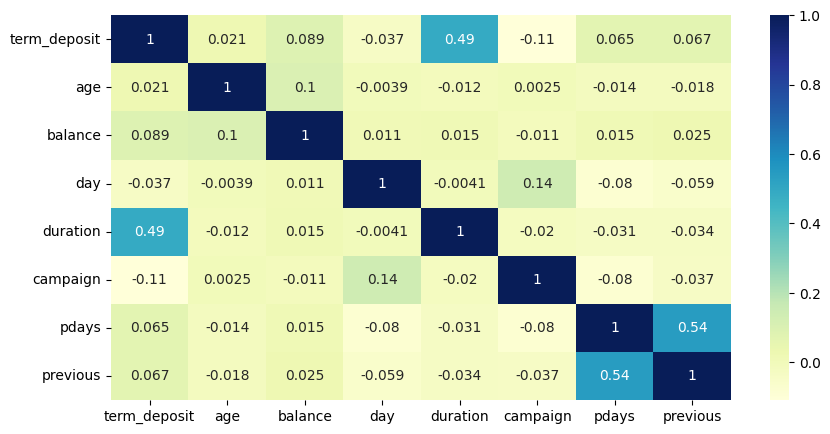

In [ ]:
#tampilkan secara visualisasi
plt.figure(figsize=(10, 5))
dataplot = sns.heatmap(df_num.corr(),cmap="YlGnBu", annot=True)
dataplot

Dari informasi diatas dapat disimpulkan bahwa:
- Korelasi antar fitur **lemah** baik untuk korelasi positif maupun korelasi negatif.
- korelasi yang tertinggi adalah (diatas 0.1 atau dibawah -0.1):

  1. term_deposit dengan previous --> korelasi lemah positif
  2. term_deposit dengan pdays --> korelasi lemah positif
  3. term_deposit dengan campaign --> korelasi lemah negatif
  4. term_deposit dengan day --> korelasi lemah negatif
  5. term_deposit dengan balance --> korelasi lemah positif
  6. term_deposit dengan age --> korelasi lemah positif
- Dapat disimpulkan bahwa hubungan linear variabel dependen dan independen terhadap `term_deposit` **lemah**


### 4-5 Distribusi Target (`term_deposit`)

Selanjutnya dilakukan visualisasi distribusi target untuk mengetahui jumlah data klien pada `term_deposit`, serta percentase dari distribusi data tersebut.

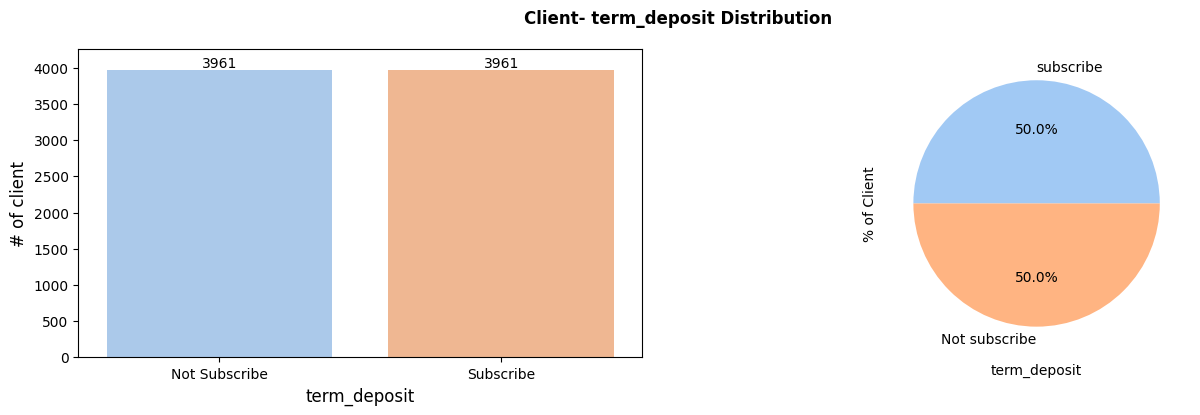

In [ ]:
# Membuat visualisasi Distribusi churn_risk_score
fig, ax =plt.subplots(1,2,figsize=(16,4))

sns.countplot(x='term_deposit', data=df_eda,palette = sns.color_palette('pastel')[0:10], ax=ax[0])
ax[0].set_xlabel("term_deposit", fontsize= 12)
ax[0].set_ylabel("# of client", fontsize= 12)
fig.suptitle('Client- term_deposit Distribution', fontsize=12, fontweight='bold')
ax[0].set_ylim(0,4250)
plt.xlabel("term_deposit", fontsize= 10)
plt.ylabel("# of Client", fontsize= 10)
ax[0].set_xticks([0,1], ['Not Subscribe', 'Subscribe'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+100), ha='center', va='center',fontsize = 10)

df_eda['term_deposit'].value_counts().plot(kind='pie', labels = ['subscribe', 'Not subscribe'],autopct='%1.1f%%', textprops = {"fontsize":10}, colors = sns.color_palette('pastel')[0:10])
ax[1].set_ylabel("% of Client", fontsize= 10)
plt.show()

**Berdasarkan informasi diatas**, karena sebelumnya telah dilakukan resampling undersampling. Sehingga distribusi data pada term_deposit memiliki data yang sudah seimbang/balanced dan akan mencegah hasil pemodelan cenderung **not_subscribe** (data mayoritas).

### 4-6 Informasi Data Klien

#### Def Visualisasi

In [ ]:
#tampilkan histplot
def plotdrawing(feature,x,y):
    plt.figure(figsize=(x,y))
    fig_deposit = sns.histplot(data = df_eda, x = feature, hue = 'term_deposit', discrete=True, multiple="stack", palette = 'pastel')
    fig_deposit.set_ylabel('# of Client', fontsize = 13)
    fig_deposit.set_xlabel(f'{feature}', fontsize = 13)
    fig_deposit.set_title(f'deposit terhadap {feature}', fontsize = 14)
    for c in fig_deposit.containers:
        labels = [f'{h/df.deposit.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        fig_deposit.bar_label(c, labels=labels, label_type='edge')

In [ ]:
def kde(feature):
    plt.figure(figsize=(10,4))
    age_dep = sns.kdeplot(data = df_eda, x = feature, hue = 'term_deposit', multiple="stack", palette= 'pastel')
    age_dep.set_ylabel('# of clients', fontsize = 13)
    age_dep.set_xlabel(f'{feature}', fontsize = 13)
    age_dep.set_title(f'deposit terhadap {feature}', fontsize = 14)
    plt.show()

In [ ]:
#definisikan data visualisasi
def visualize(c, x,y):
    plt.figure(figsize=(x,y))
    x=[0.02 for i in range(len(list(df_eda[c].unique())))]

    plt.subplot(1, 2,1)
    plt.title(f'{c} terhadap #deposit', fontsize=12)
    ax = sns.countplot(data = df_eda, x = c, hue="term_deposit", palette = sns.color_palette('pastel')[0:10])
    plt.xlabel(f'{c}', fontsize= 12)
    plt.ylabel("#deposit", fontsize= 12)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    for p in ax.patches:
        ax.annotate("%.0f" %(p.get_height()), (p.get_x()+0.01, p.get_height()+1),fontsize=9)

    plt.subplot(1, 2,2)
    plt.title(f'{c} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = c, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{c}', fontsize= 12)
    plt.ylim(0,1)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)
    plt.show()

In [ ]:
 #definisikan data visualisasi
def pieviz(c, a,b):
    plt.figure(figsize=(15,4))
    x=[0.02 for i in range(len(list(df_eda[c].unique())))]

    plt.subplot(1, 3,1)
    plt.title(f'{c} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = c, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{c}', fontsize= 12)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)


    plt.subplot(1, 3,2)
    plt.title(f'{a} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = a, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{a}', fontsize= 12)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)


    plt.subplot(1, 3,3)
    plt.title(f'{b} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = b, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{b}', fontsize= 12)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)
    plt.show()

In [ ]:
def countviz(a,b, f,d):
    plt.figure(figsize=(f, d))

    plt.subplot(1,2,1)
    x=[0.02 for i in range(len(list(df_eda[a].unique())))]
    plt.title(f'{a} terhadap #balance', fontsize=12)
    ax = sns.barplot( x = a, y="balance",data = df_eda, palette = sns.color_palette('pastel')[0:10], errorbar= None)
    plt.xlabel(f'{a}', fontsize= 12)
    plt.ylabel("#balance", fontsize= 12)
    plt.xticks(rotation=90)
    plt.legend(loc='best')
    for p in ax.patches:
        ax.annotate("%.0f" %(p.get_height()), (p.get_x()+0.01, p.get_height()+1),fontsize=9)


    plt.subplot(1,2,2)
    plt.title(f'{b} terhadap #balance & term_deposit', fontsize=12)
    ax = sns.barplot( x = b, y="balance",data = df_eda, palette = sns.color_palette('pastel')[0:10], errorbar= None)
    plt.xlabel(f'{b}', fontsize= 12)
    plt.ylabel("#balance", fontsize= 12)
    plt.xticks(rotation=90)
    plt.legend(loc='best')
    for p in ax.patches:
        ax.annotate("%.0f" %(p.get_height()), (p.get_x()+0.01, p.get_height()+1),fontsize=9)

    plt.show()

In [ ]:
def time(a, b, f,d):
    plt.figure(figsize=(f, d))

    plt.subplot(1, 2, 1)
    age_dep = sns.histplot(data = df_eda, x = a, hue = 'term_deposit', multiple="stack",binwidth=30, palette= 'pastel')
    age_dep.set_ylabel('#clients', fontsize = 13)
    age_dep.set_xlabel(a, fontsize = 13)
    plt.xticks(rotation=90)
    age_dep.set_title(f'{a} terhadap term_deposit', fontsize = 14)


    plt.subplot(1, 2, 2)
    plt.title(f'{b} terhadap %deposit', fontsize=12)
    ax = sns.barplot(x = b, y = "term_deposit", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%deposit", fontsize= 12)
    plt.xlabel(f'{b}', fontsize= 12)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.005),fontsize=9)
    plt.show()

#### Age

Text(0.5, 1.0, '# % client terhadap age')

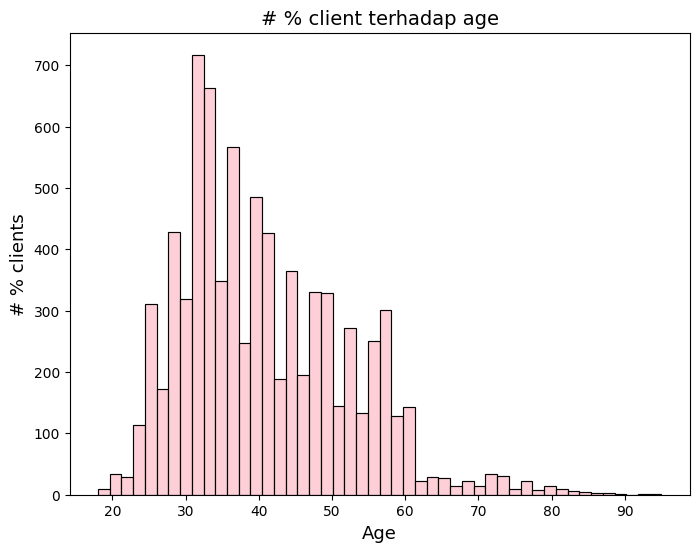

In [ ]:
#distribusi age
plt.figure(figsize=(8, 6))
age_plt = sns.histplot(data = df_eda[df_eda['age'] <= 100]['age'], color = 'pink')
age_plt.set_ylabel('# % clients', fontsize = 13)
age_plt.set_xlabel('Age', fontsize = 13)
age_plt.set_title('# % client terhadap age', fontsize = 14)

**Berdasarkan gambar tersebut:**
- Umur klien memiliki range dari 18 tahun hingga 95 tahun.
- Kebanyakan klien yang berumur 30 tahun yang menjadi klien di bank ini.

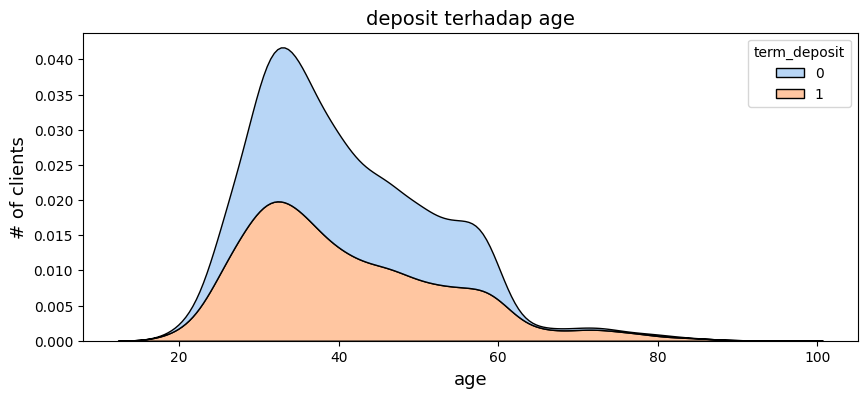

In [ ]:
kde('age')

Selanjutnya, dilakukan pembagian kategori umur (dewasa Muda, Paruh Baya, Lansia) berdasarkan [DepKes RI](http://www.e-jurnalmitrapendidikan.com/index.php/e-jmp/article/download/643/423/#:~:text=Kategori%20umur%20menurut%20Depkes%20RI,atas%20(Ramadhan%2C%202014) untuk melihat pengaruh deposit terhadap kategori umur.

In [ ]:
def ages(df_eda):
    if (18 <= df_eda['age'] <= 39) :
        return 'Dewasa Muda'
    elif (40 <= df_eda['age'] <= 59):
        return 'Paruh Baya'
    elif (60 <= df_eda['age']):
        return 'Lansia'
df_eda['Age Group'] = df_eda.apply(ages, axis = 1)

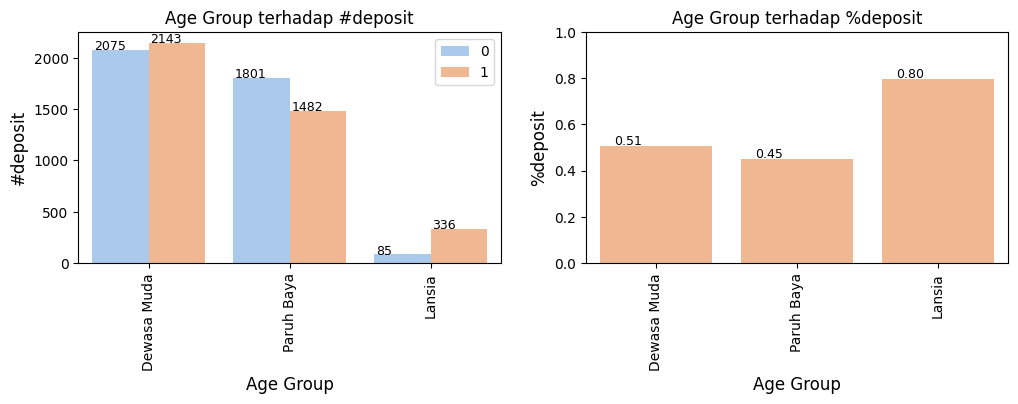

In [ ]:
#tampilkan ratio data
visualize('Age Group', 12, 3)

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- Kebanyakan klien yang berlangganan deposito berjangka adalah usia lansia, yaitu sebesar 79%. Hal ini karena pendapatan pasif berupa bunga dari bank sangat membantu para lansia dalam menjalani kehidupan setelah pensiun.
- Pada group dewasa muda dan paruh baya, hanya sebagian (~50%) yang berlangganan deposito berjangka

#### Job

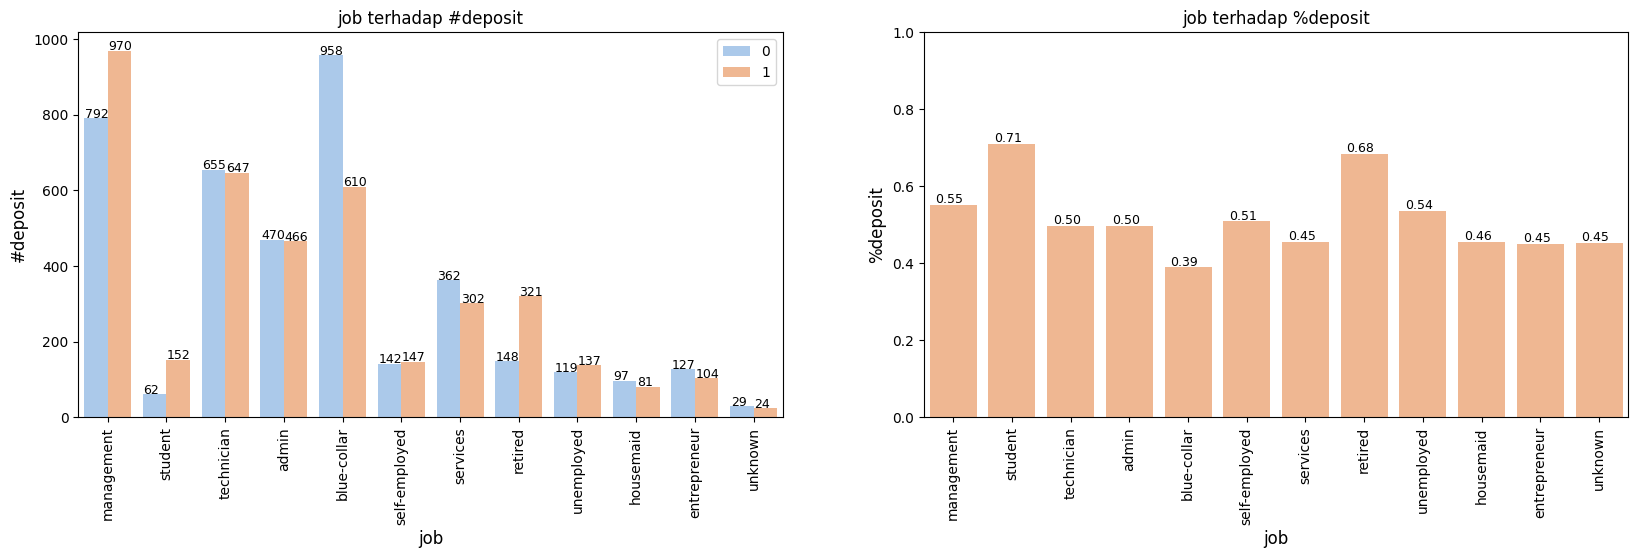

In [ ]:
#buat visualisasi feature: job, size : x,y
visualize('job', 20, 5)

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- Klien pada bank ini didominasi oleh pekerja blue-colar, technician dan admin
- Meskipun demikian, persentase yang berlangganan deposit berjangga didominasi oleh klien yang masih bersekolah (student) dan telah pensiun (retired)
  - Pada klien yang masih bersekolah, banyak orang tua yang telah menyiapkan tabungan untuk anaknya sejak kecil. Sehingga kebanyakan dari mereka berlangganan deposito berjangka karena terdapat passive income (bunga dari bank) yang dapat membantu pembiayaan/kebutuhan anak-anak mereka.  
  - pada klien yang telah pensiun, passive income (bunga bank) juga menguntungkan karena ketidakmampuan mereka untuk bekerja lagi.


#### Marital Status

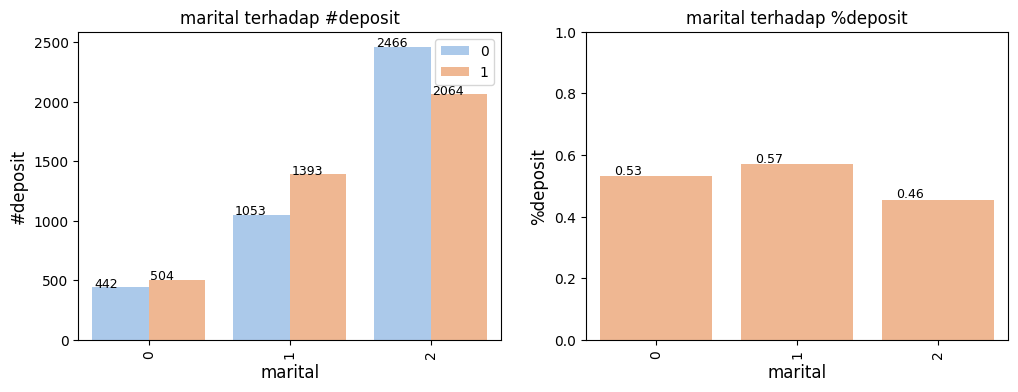

In [ ]:
#tampilkan visualisasi marital
visualize('marital', 12, 4)

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- `(0: divorced, 1: single, 2: married)`
- Mayoritas klien pada bank tersebut adalah klien yang sudah menikah (2: married)
- Ketika kategori tersebut tidak memiliki perbedaan yang signifikan dalam berlangganan deposito berjangka ini.
- meskipun demikian, status pernikahan menentukan apakah seseorang akan berlangganan deposito berjangka atau tidak. single dan divorced lebih cenderung akan berlangganan pada deposito berjangka karena kebanyakan single yang masih bersekolah dan yang divorced dapat mendapatkan pasif income yang menguntungkan untuk kedua kategori tersebut.


#### Education

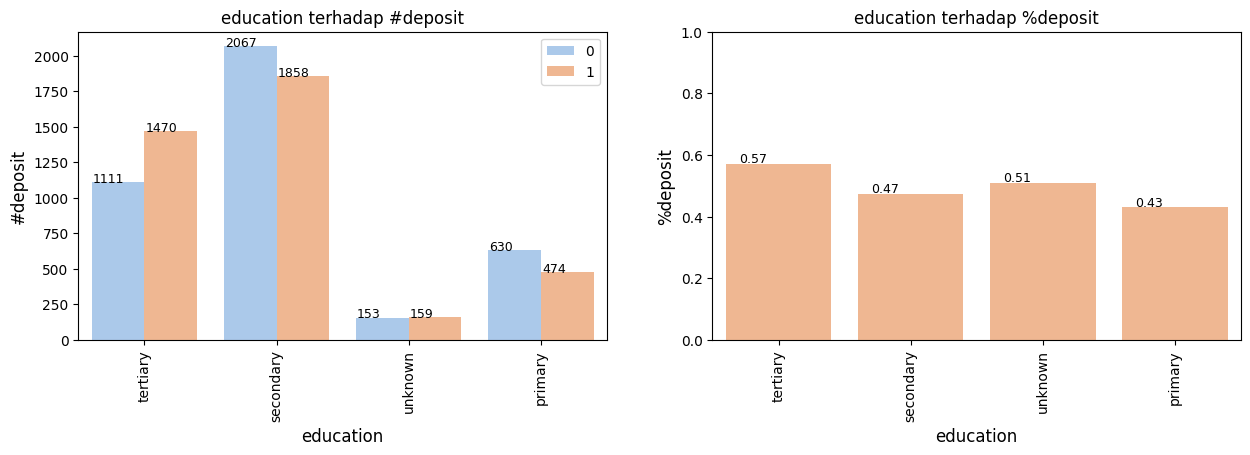

In [ ]:
#tampilkan data education
visualize('education', 15, 4)

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**

- Klien yang memiliki tingkat pendidikan tertiary memiliki kemungkinan untuk berlangganan deposito berjangka tertinggi dibandingkan dengan yang lain.
- Sementara itu, klien pada bank ini kebanyakan memiliki tingkat pendidikan secondary yang lebih cenderung untuk tidak berlangganan deposito berjangka.
- semakin tinggi tingkat pendidikan klien, semakin mungkin klien tersebut berlangganan deposito berjangka.
- Hal ini dikarenakan pada tertiary level (kuliah), gaji yang diterima oleh orang yang telah berkuliah kebanyakan lebih banyak dibandingkan dengan orang-orang yang hanya bersekolah hingga SMA. Sehingga kemungkinan untuk berlangganan deposito pada tertiary level lebih tinggi dibandingkan secondary.

### 4-7 Riwayat Default, Housing dan Loan

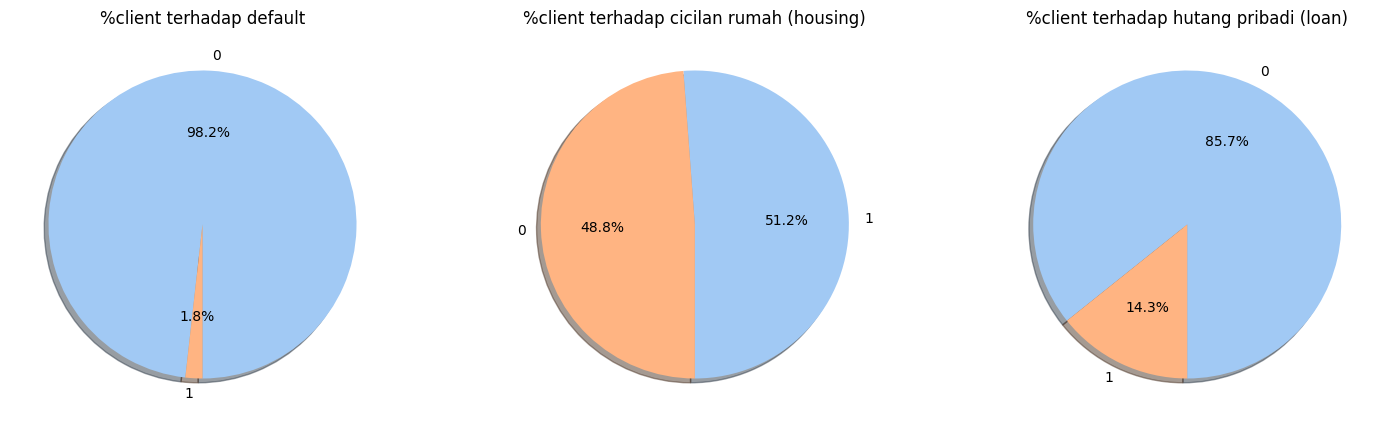

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
labels =df_eda['default'].value_counts(sort = 1).index
sizes = df_eda['default'].value_counts(sort = 1)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270, colors= sns.color_palette('pastel'))
plt.title('%client terhadap default',size = 12)

plt.subplot(1,3,2)
labels =df_eda['housing'].value_counts(sort = 1).index
sizes = df_eda['housing'].value_counts(sort =1)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270, colors= sns.color_palette('pastel'))
plt.title('%client terhadap cicilan rumah (housing)',size = 12)

plt.subplot(1,3,3)
labels =df_eda['loan'].value_counts(sort = 1).index
sizes = df_eda['loan'].value_counts(sort = 1)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270, colors= sns.color_palette('pastel'))
plt.title('%client terhadap hutang pribadi (loan)',size = 12)
plt.show()

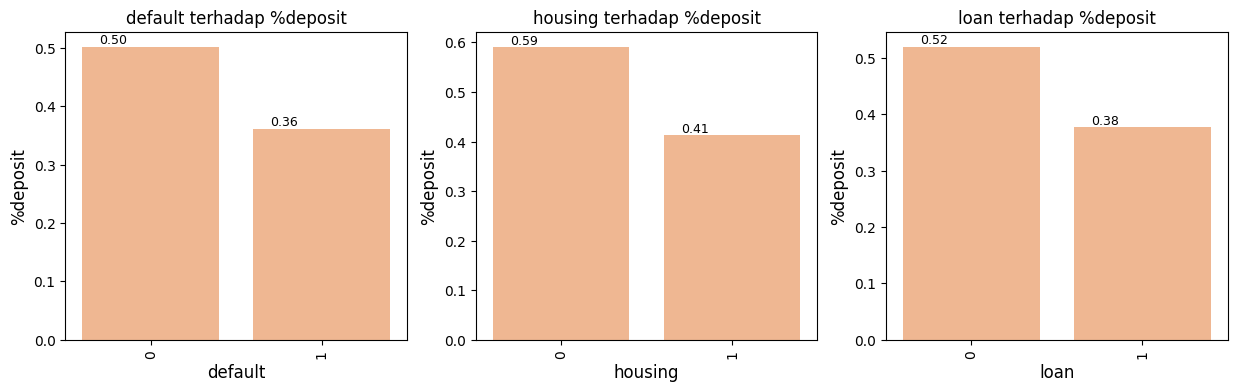

In [ ]:
#visualisasikan trehadap term_deposit
pieviz('default', 'housing', 'loan')

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**
- **Klien** pada bank ini** didominasi** oleh klien yang **tidak pernah default (92.8%)**, mempunyai **cicilan rumah(51.2%)**, dan **tidak punya hutang pribadi(85.7%)**.
- Sementara itu, klien yang** berlangganan deposito berjangka** adalah klien yang **tidak pernah default**, **tidak** memiliki **cicilan rumah**, dan **tidak** memiliki **hutang pribadi**
- Hal ini berarti, klien yang bebas dari hutang dan tidak pernah default 2X lebih mungkin berlangganan deposito berjangka.


### 4-8  Balance terhadap term_deposit, age, dan jobs

- **Balance**

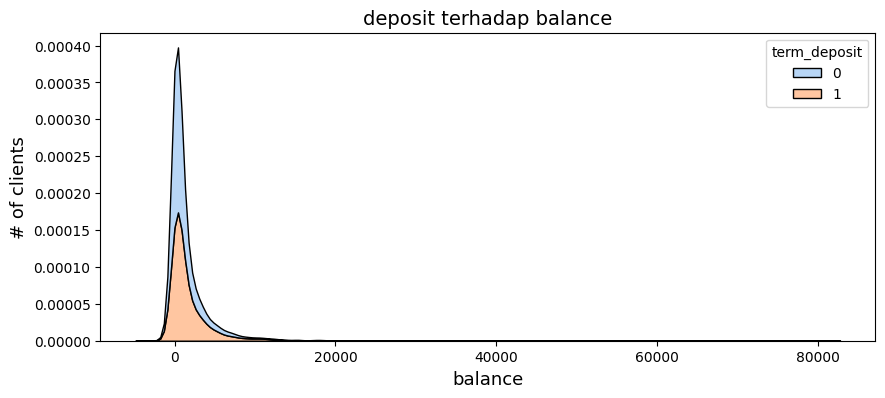

In [ ]:
#visualisasi balance terhadap deposit
kde('balance')

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**
- klien pada bank ini memiliki jmlah balance maksimal 85000 VDN
- Klien yang memiliki jumlah balance dibawah 20.000 VDN cenderung berlangganan deposito berjangka.

In [ ]:
#kategori balance
def balance_cat(df_eda):
    if (df_eda['balance'] < 0) :
        return 'Negative Balance'
    elif (0 <= df_eda['balance'] < 500):
        return 'Low Balance'
    elif (500 <= df_eda['balance'] < 1500):
        return 'Average Balance'
    elif (1500 <= df_eda['balance'] < 4000):
        return 'High Balance'
    elif (4000 <= df_eda['balance']):
        return 'Very High Balance'
df_eda['balance_cat'] = df_eda.apply(balance_cat, axis = 1)

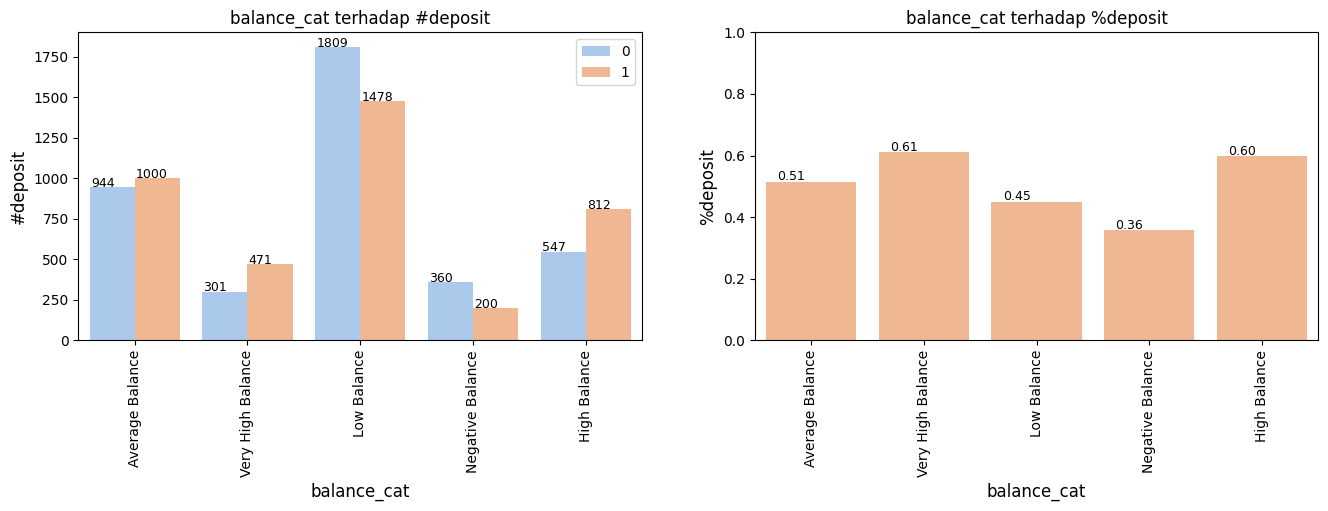

In [ ]:
#visualisasi balance terhadap deposit
visualize('balance_cat', 16, 4)

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**
- klien pada bank ini didominasi oleh klien yang memiliki balance yang rendah.
- **Semakin tinggi balance** klien, **semakin mungkin** klien tersebut **berlangganan deposito berjangka**

- **Balance terhadap Age Group**

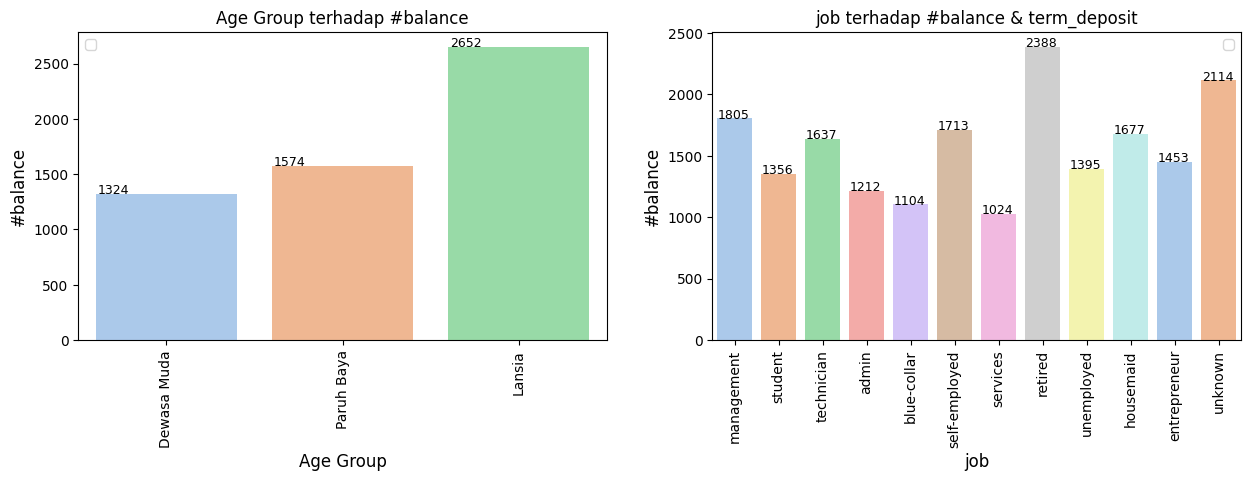

In [ ]:
#tampilkan age group terhadap balance
countviz('Age Group','job', 15, 4)

**Berdasarkan gambar tersebut, dapat disimpulkan bahwa:**
- Lansia memiliki jumlah balance tertinggi dibanding yang lain.
- semakin tua orang tersebut, semakin besar jumlah balance yang dimiliki.
- Pekerjaan untuk kategori retired, unknown dan management merupakan kategori pekerjaan dengan jumlah balance tertinggi.

### 4-9 Day, Month, Duration, Campaign, Pdays, Previous

#### Last Contact Day

In [ ]:
#menggabungkan month dengan day
df_eda['month'] = df_eda['month'].str.capitalize()
df_eda['day'] = df_eda['day'].astype(str).str.zfill(2)
df_eda['Last_contact_day'] = df_eda['day'].astype(str) + '-' + df['month']
df_eda['Last_contact_day']  =  pd.to_datetime(df_eda['Last_contact_day'], format='%d-%b')
df_eda['Last_contact_day'] = df_eda['Last_contact_day'].dt.dayofyear

#mapping month
df_eda['month']= df_eda['month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})

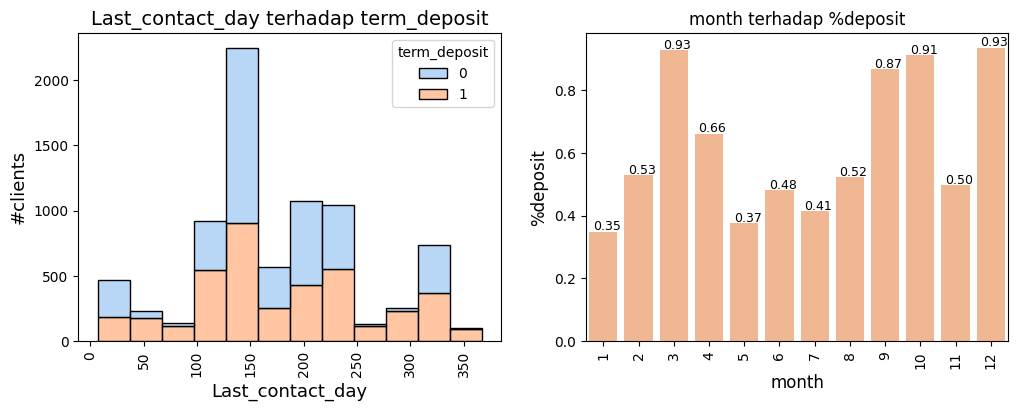

In [ ]:
#definisikan eda_num untuk feature numerik
time('Last_contact_day','month', 12, 4)

**Berdasarkan gambar tersebut, didapatkan bahwa:**

- **Day** + **month**= **last_contact_day**
  - terlihat bahwa klien terbanyak berada pada bulan **May**. Namun pada bulan tersebut memiliki persen klien yang berlangganan deposito berjangka sangat rendah. Hal ini berarti, banyak klien yang menolak penawaran untuk berlangganan.
  
  - Sehingga **bank sebaiknya lebih fokus pada bulan Maret, Desember, September, dan Oktober** yang kliennya cenderung ingin berlanggananan deposito berjangka pada bulan-bulan tersebut.
  - Pada akhir tahun, umumnya orang-orang memiliki revolusi tahunan, faktor eksternal tersebut dapat menjadi penyebab terjadinya peningkatan jumlah klien yang ingin berlangganan deposito terjangka.


#### **Duration**

In [ ]:
bins = [-1,30,90,300,600,1200,1800,2400,3000,4918]
labels =['0-30','30-90','90-300','300-600','600-1200','1200-1800','1800-2400','2400-3000','3000-']
df_eda['binned_duration'] = pd.cut(df_eda['duration'], bins,labels=labels)

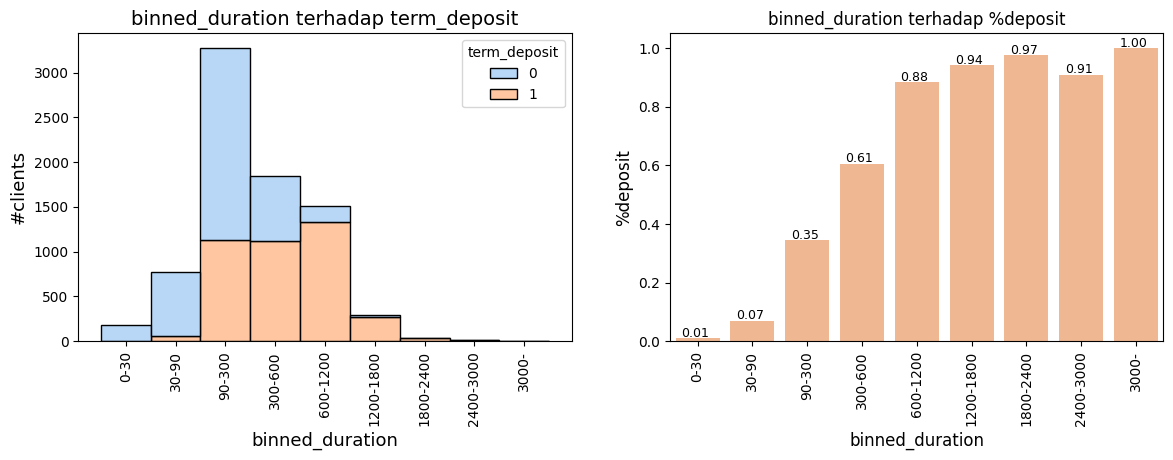

In [ ]:
#tampilkan binned duration
time('binned_duration', 'binned_duration', 14,4 )

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- Klien terbanyak berada pada range (90-300). Sementara, pada range (2400-3000) merupakan persentase klien terbanyak yang subscribe deposito berjangka. Namun, data sample pada range tersebut sangat kecil.
- **Semakin lama durasi marketing, semakin besar kemungkinan klien tersebut akan berlangganan deposito berjangka.**   

#### Campaign, pdays, duration

In [ ]:
#buat bin campaign
bins = [0,1,5,10,30,50,63]
labels =['1','2-5','6-10','11-30','31-50','51-']
df_eda['binned_campaign'] = pd.cut(df_eda['campaign'], bins,labels=labels)

#buat bin pdays
bins = [-2,0,30,90,180,365,730,872]
labels =['-1','0-30','30-90','90-180','180-360','360-730','730-']
df_eda['binned_pdays'] = pd.cut(df_eda['pdays'], bins,labels=labels)

#bin duration
bins = [-1,0,1,5,20,50,100,275]
labels =['0','1','2-5','6-20','21-50','51-100','101-']
df_eda['binned_previous'] = pd.cut(df_eda['previous'], bins,labels=labels)

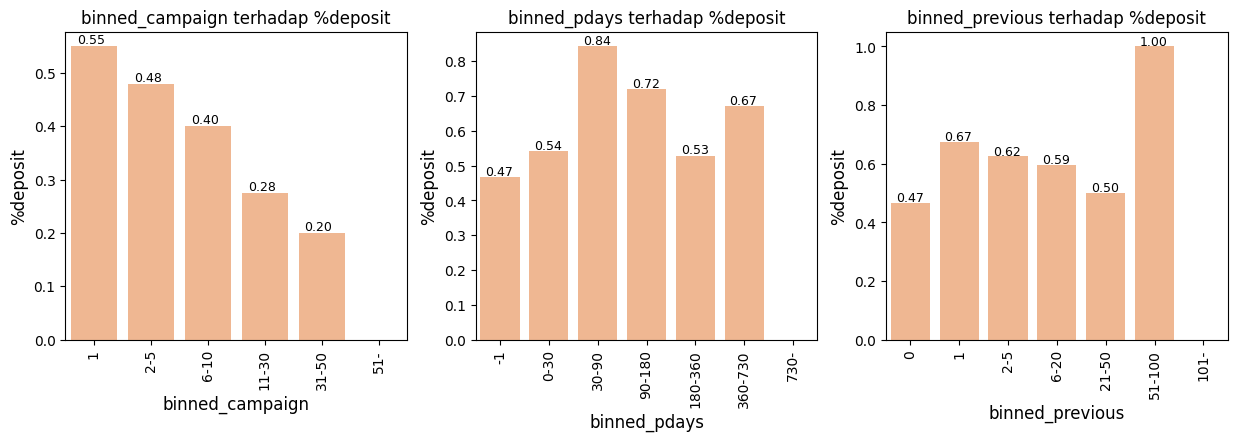

In [ ]:
#visualisasi
pieviz('binned_campaign','binned_pdays', 'binned_previous')

**Berdasarkan informasi tersebut, dapat disimpulkan bahwa:**
- campaign
  - Klien terbanyak berada pada range (2-5). Sementara, pada 1 merupakan persentase klien terbanyak yang subscribe deposito berjangka.
  - **Semakin sedikit kontak yang dihubungi selama sedang memasarkan produk, semakin besar pula kemungkinan klien akan berlangganan deposito berjangka**

- Pdays
  - Klien cenderung menerima tawaran untuk berlangganan dengan deposito berjangka setelah 30-90 hari dikontak lagi oleh tim marketing.
  - **Klien yang tidak dikontak lagi** oleh tim marketing, cenderung **tidak akan berlangganan deposito berjangka**.

- previous
  - klien yang dikontak oleh tim marketing hingga 51-100 kali sebelumnya memiliki kemungkinan untuk berlangganan deposito berjangka.
  - nilai tersebut bernilai 100% karena hanya terdiri dari 3 klien. Sehingga perlu diinvestigasi lebih dalam
  - **Semakin sering tim marketing menghubungi klien, semakin besar pula kemungkinan klien tersebut akan berlangganan.**


---
**Notes:**
 - Berdasarkan EDA yang telah dilakukan, fitur yang akan digunakan adalah age, job, marital, education, default, balance, housing, loan, Last_contact_day, duration, campaign, pdays, previous


## 5 - Feature Engineering



---


**Notes:**
Pada feature Engineering akan dilakukan:
1. split data
2. handle outlier
3. handle nilai missing
4. Seleksi fitur
5. feature scalling


---



Selanjutnya dilakukan feature engineering untuk membuat pemodelan. Namun sebelumnya, dibuat variabel baru RS agar pemanggilan random_state lebih mudah.

In [ ]:
df= dfs.copy()

In [ ]:
#menggabungkan month dengan day
df['month'] = df['month'].str.capitalize()
df['day'] = df['day'].astype(str).str.zfill(2)
df['last_contact_day'] = df['day'].astype(str) + '-' + df['month']
df['last_contact_day']  =  pd.to_datetime(df['last_contact_day'], format='%d-%b')
df['last_contact_day'] = df['last_contact_day'].dt.dayofyear


#mapping month
df['month']= df['month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
#ubah tipe data ke numerik
df['last_contact_day'] = df['last_contact_day'].astype(int)
df['day'] = df['day'].astype(int)
df['month']=df['month'].astype(int)

In [ ]:
#buat variabel random state
RS=27

### 5-1 Split X (Features) dan y(Target)

Data dilakukan split antara features dan target agar tidak terjadi kebocoran data. Data y (target) adalah `term_deposit` dan X adalah keseluruhan feature (kecuali data target)

In [ ]:
#split data menjadi X, y
X= df.drop(['term_deposit'], axis=1)
y=df['term_deposit']

In [ ]:
#tampilkan data X
X.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,last_contact_day
0,5305,30,management,1,tertiary,0,1243,1,0,23,5,135,1,-1,0,143
1,39400,28,student,1,secondary,0,5916,0,0,22,5,259,1,63,5,142
2,15545,29,management,1,secondary,0,0,0,1,21,7,463,2,-1,0,202
3,5000,32,technician,1,unknown,0,317,1,0,21,5,394,2,-1,0,141
4,31865,54,admin.,2,primary,0,546,1,0,9,4,40,1,-1,0,99


In [ ]:
#tampilkan data y
y

0       0
1       0
2       0
3       0
4       0
       ..
7917    1
7918    1
7919    1
7920    1
7921    1
Name: term_deposit, Length: 7922, dtype: int64

### 5-3 Split antara Train-set dan Test-set

Selanjutnya lakukan split train-set dan test-set dengan persentase
- train_val: 80%
- test-set: 20%.

Karena data telah seimbang(balance), sehingga tidak perlu menggunakan stratify.

In [ ]:
#spliting antara train-set dan test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=27)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train.head()

Train Size :  (6733, 16)
Test Size :  (1189, 16)


,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,last_contact_day
255,9812,50,retired,1,primary,0,208,0,0,9,6,51,1,-1,0,160
3872,29263,37,technician,2,secondary,0,494,1,0,2,2,247,2,269,3,33
2879,37467,36,services,2,secondary,0,-302,1,0,13,5,36,2,-1,0,133
2382,17423,34,technician,1,secondary,0,2683,0,0,28,7,73,2,-1,0,209
5407,28982,50,unemployed,0,unknown,0,1088,0,0,2,2,749,1,-1,0,33


In [ ]:
#tampilkan hasil split
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,last_contact_day
255,9812,50,retired,1,primary,0,208,0,0,9,6,51,1,-1,0,160
3872,29263,37,technician,2,secondary,0,494,1,0,2,2,247,2,269,3,33
2879,37467,36,services,2,secondary,0,-302,1,0,13,5,36,2,-1,0,133
2382,17423,34,technician,1,secondary,0,2683,0,0,28,7,73,2,-1,0,209
5407,28982,50,unemployed,0,unknown,0,1088,0,0,2,2,749,1,-1,0,33


In [ ]:
#tampilkan hasil split
X_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,last_contact_day
1472,23820,53,admin.,2,secondary,0,578,0,0,29,8,59,2,-1,0,241
4451,13068,52,entrepreneur,2,tertiary,1,-468,0,0,8,7,534,1,-1,0,189
469,28796,36,blue-collar,2,secondary,0,160,1,0,30,1,344,2,-1,0,30
4426,12651,29,services,1,primary,0,339,0,0,4,7,1576,3,-1,0,185
1858,23697,35,technician,2,secondary,0,-78,0,0,28,8,102,13,-1,0,240


### 5-4 Handling Outlier


Selanjutnya adalah handling outlier pada variabel X_train dan X_val. Pertama, melakukan pengecekan pada setiap fitur numerik untuk mengetahui apakah terdapat outlier atau tidak.

#### Outlier X_train

In [ ]:
#fungsi untuk menampilkan outlier pada masing-masing variabel yang ditentukan.
def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(20, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

In [ ]:
#variabel yang ingin dicek outliernya
check_outlier_columns= ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day', 'month', 'last_contact_day']

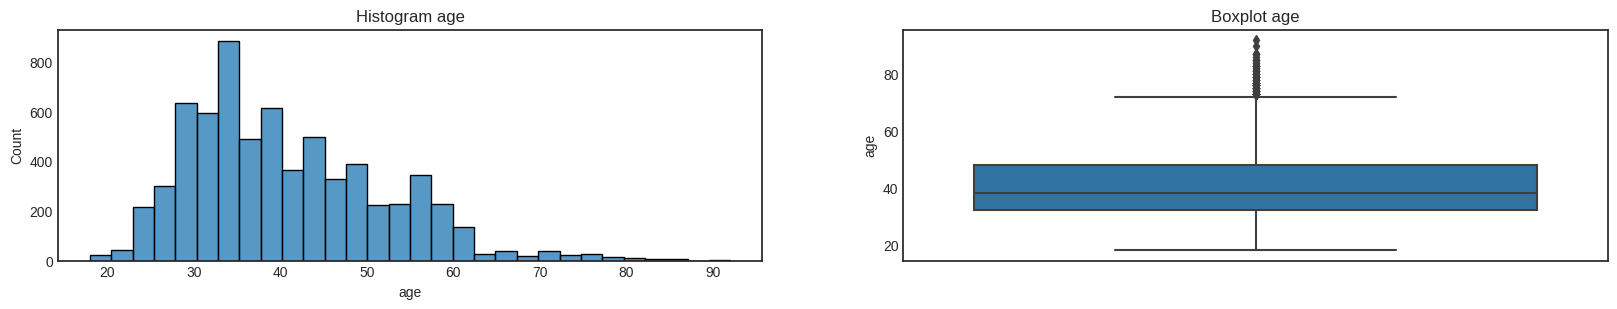

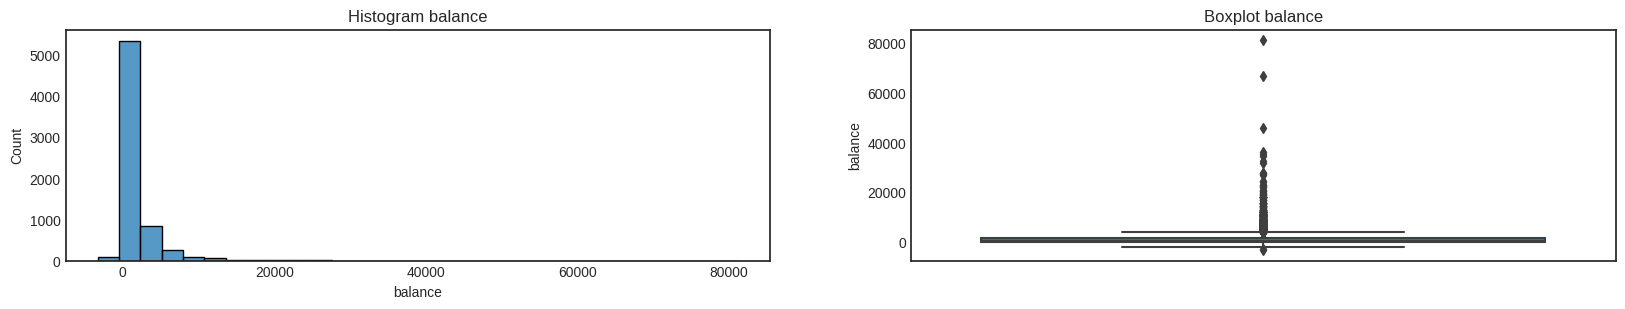

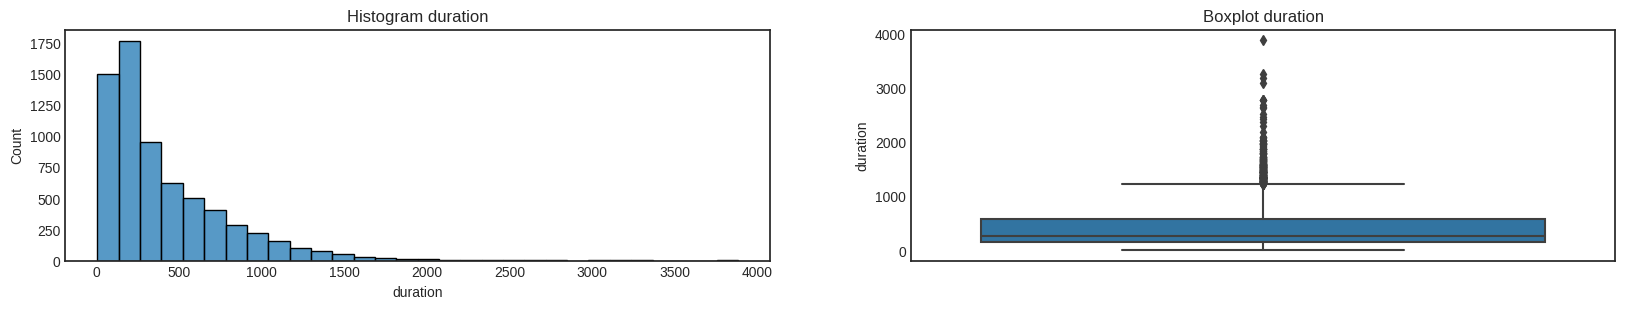

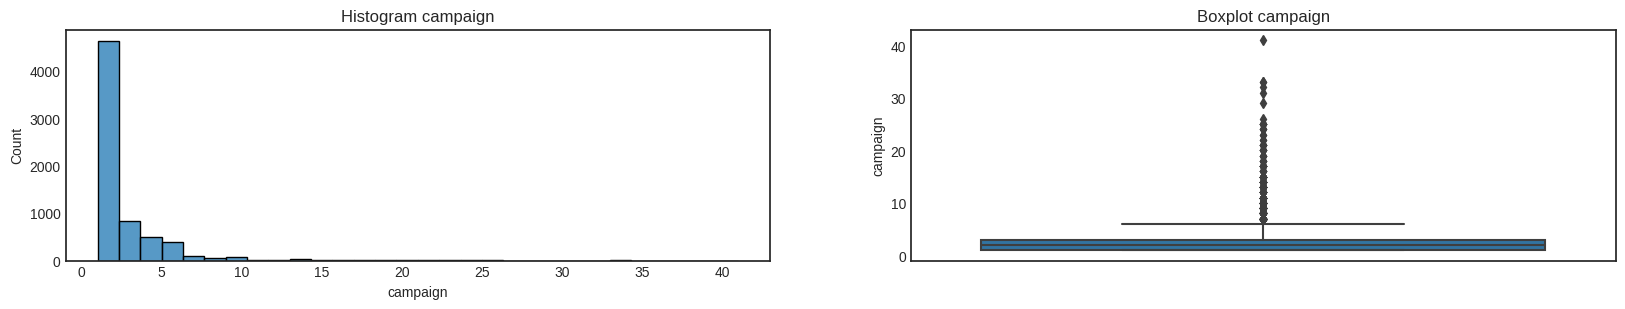

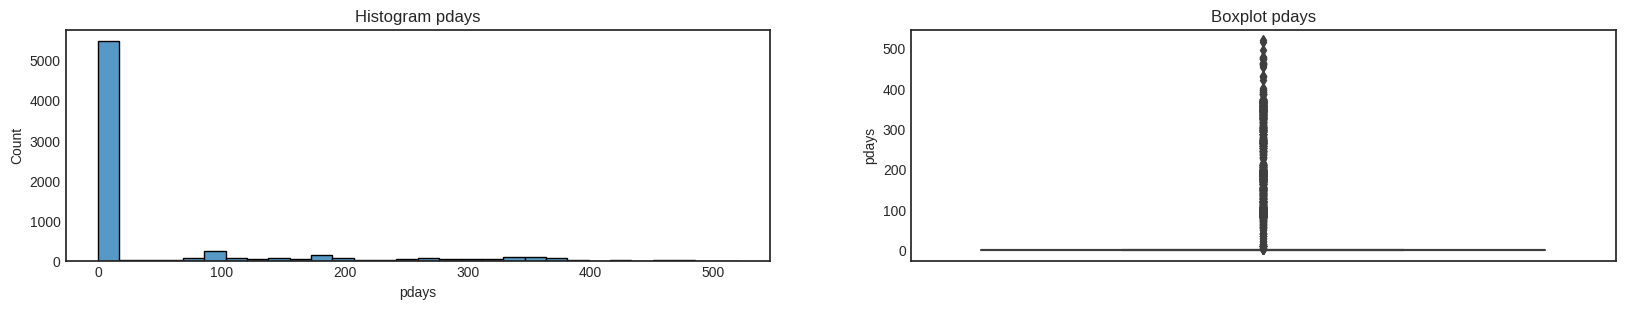

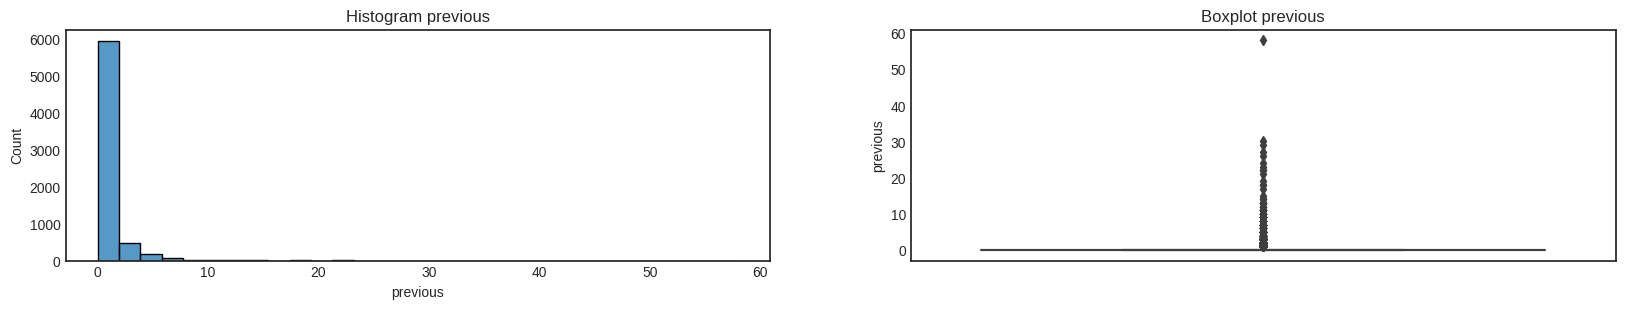

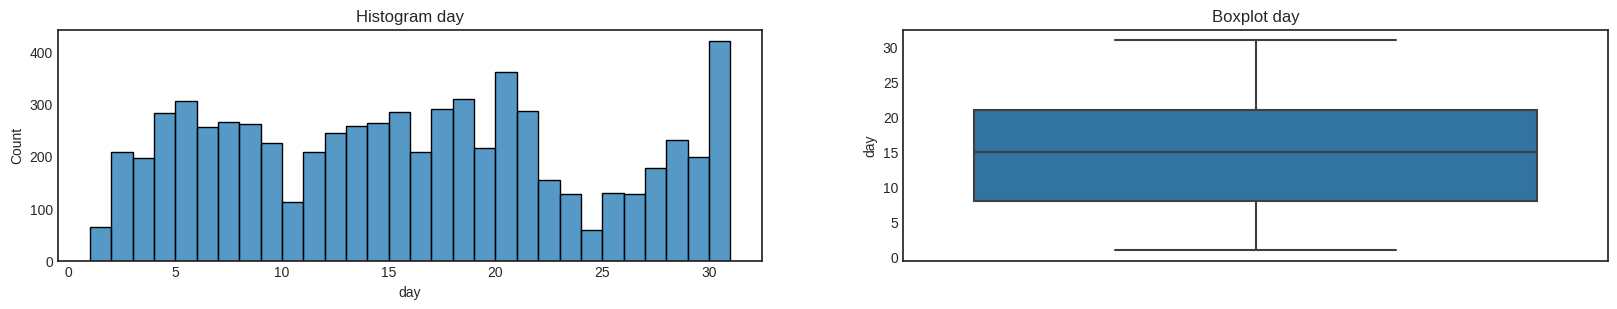

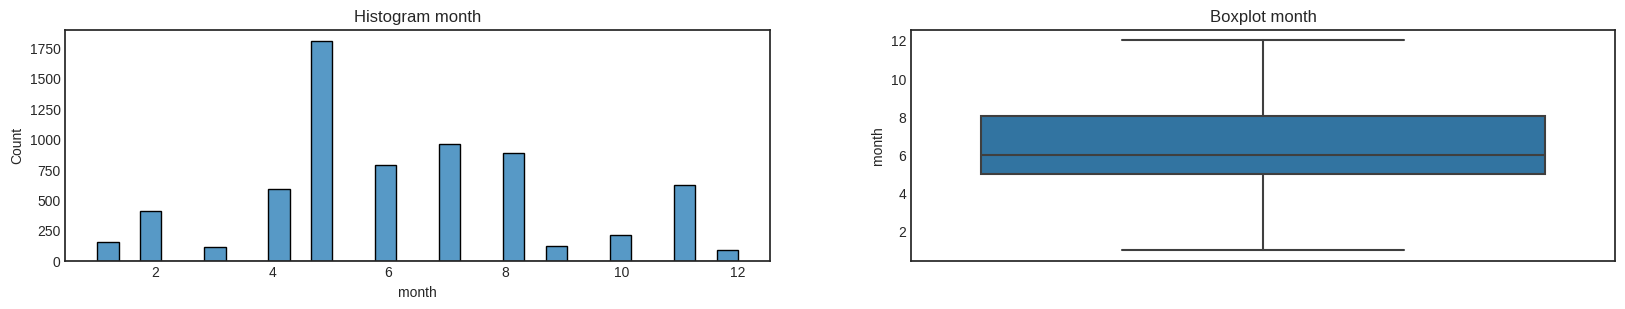

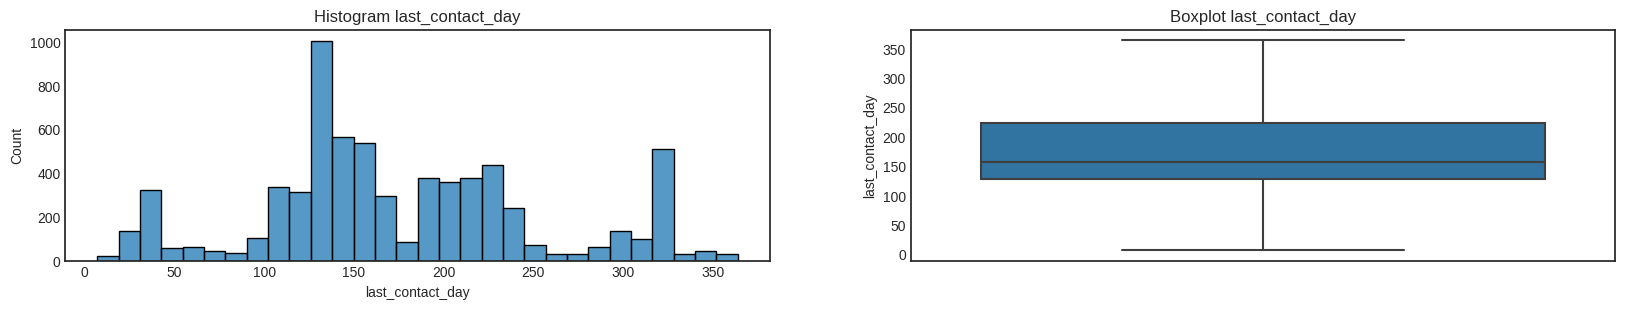

In [ ]:
#tampilkan distribusi dari masing-masing numerik-outlier
for i in check_outlier_columns :
    diagnostic_plots(X_train, i)

Kemudian lakukan pengecekan pada persentase outlier dari setiap fitur.

In [ ]:
# Fungsi Pengecekan Outlier
def outliers_check(df,variable):
    #Cek skew feature
    global interq
    global lower_boundary
    global upper_boundary
    skew = df[variable].skew()
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary, skew

In [ ]:
#tampilkan informasi data oulier
for i in check_outlier_columns:
    print(i)
    print('Jumlah Outlier:' ,round((len(outliers_check(X_train, i)[0])),2))
    print('Persentase Outlier:' ,round((len(outliers_check(X_train, i)[0])/len(X_train)*100),2))
    print('Skew:' ,round((outliers_check(X_train, i)[3]),2))
    print('Lower Boundary:' ,round((outliers_check(X_train, i)[1]),2))
    print('Upper Boundary:' ,round((outliers_check(X_train, i)[2]),2))
    print('---')

age
Jumlah Outlier: 90
Persentase Outlier: 1.34
Skew: 0.81
Lower Boundary: 8.0
Upper Boundary: 72.0
---
balance
Jumlah Outlier: 330
Persentase Outlier: 4.9
Skew: 7.78
Lower Boundary: -4420.0
Upper Boundary: 6143.0
---
duration
Jumlah Outlier: 39
Persentase Outlier: 0.58
Skew: 1.91
Lower Boundary: -1148.0
Upper Boundary: 1869.0
---
campaign
Jumlah Outlier: 167
Persentase Outlier: 2.48
Skew: 4.58
Lower Boundary: -5.0
Upper Boundary: 9.0
---
pdays
Jumlah Outlier: 1273
Persentase Outlier: 18.91
Skew: 2.53
Lower Boundary: -1.0
Upper Boundary: -1.0
---
previous
Jumlah Outlier: 1273
Persentase Outlier: 18.91
Skew: 9.87
Lower Boundary: 0.0
Upper Boundary: 0.0
---
day
Jumlah Outlier: 0
Persentase Outlier: 0.0
Skew: 0.15
Lower Boundary: -9.98
Upper Boundary: 40.9
---
month
Jumlah Outlier: 0
Persentase Outlier: 0.0
Skew: 0.29
Lower Boundary: -1.27
Upper Boundary: 13.83
---
last_contact_day
Jumlah Outlier: 0
Persentase Outlier: 0.0
Skew: 0.33
Lower Boundary: -58.4
Upper Boundary: 408.28
---


Berdasarkan gambar dan pengecekan outlier, `day` tidak memiliki outlier, sehingga tidak perlu dilakukan handling. Sementara untuk feature lainnya, masing-masing feature memiliki skewed yang berbeda-beda. Sehingga, akan dihandling terpisah.

Sebelum melakukan handling outlier, data yang diolah perlu disalin terlebih dahulu agar data tidka hilang.

In [ ]:
#buat variable baru terlebih dahulu
X_train_clean= X_train.copy()

##### ***Handling outlier `age`***

Outlier pada fitur ini berjumlah 74 (1.29% dari keseluruhan data) dan distribusi pada fitur ini adalah *right skew*. Selanjutnya dilakukan pengecekan statistik deskriptif untuk oulier ini untuk menentukan jenis handling yang tepat.

In [ ]:
#cek statistik deskriptif untuk outlier age
outlier_age = outliers_check(X_train_clean,'age')[0]
outlier_age['age'].describe()

count    90.000000
mean     77.922222
std       4.414551
min      73.000000
25%      74.000000
50%      77.000000
75%      80.000000
max      92.000000
Name: age, dtype: float64

Terlihat bahwa outliers pada age merupakan outliers dari klien yang memiliki usia rata-rata 74 tahun/retired. Berdasarkan pada poin EDA, terlihat bahwa distribusi age untuk klien yang subscribe dan tidak subscribe (term_deposit) memiliki korelasi yang lemah yaitu sebesar 0.021. Meskipun demikian, data outlier tersebut merupakan natural outliers karena klien yang bergabung dengan bank tersebut diperbolehkan dari berbagai jenis umur, sehingga akan dihandle dengan winsorizer.

##### ***Handling Outlier pada `balance`***

Pada fitur balance, terdapat 5.28% outlier dengan skewed ke arah ekstrim positif.

In [ ]:
#group data untuk melihat korelasi
df_eda.groupby(['term_deposit','balance'],sort=True)['balance'].count()

term_deposit  balance
0             -3313      1
              -1941      1
              -1737      1
              -1613      1
              -1224      1
                        ..
1              34646     1
               36252     1
               45248     1
               52587     1
               81204     1
Name: balance, Length: 4151, dtype: int64

Semakin besar nilai balance yang dimiliki, semakin mungkin seseorang tersebut melakukan term_deposit

In [ ]:
# Check statistik deskriptif untuk outlier
outlier_balance = outliers_check(X_train_clean,'balance')[0]
outlier_balance['balance'].describe()

count      330.000000
mean     11270.906061
std       7410.394262
min       6158.000000
25%       7306.500000
50%       9168.500000
75%      12024.000000
max      81204.000000
Name: balance, dtype: float64

Berdasarkan EDA, semakin besar nilai balance semakin mungkin klien tersebut akan subscribe term_deposit. Selain itu, outlier tersebut merupakan outlier yang termasuk natural karena nilai balance dari masing-masing klien berbeda-beda. Namun karena pemodelan machine learning sensitif terhadap outlier maka, data tersebut akan dihandle dengan winsorizer.

##### ***Handling Outlier pada `campaign`***

Pada fitur campaign, terdapat 2.67% outlier dengan skewed ke arah ekstrim positif. karena outlier cukup besar sehingga data tersebut akan dihandle dengan winsorizer.

In [ ]:
# Check statistik deskriptif untuk outlier

outlier_campaign = outliers_check(X_train_clean,'campaign')[0]
outlier_campaign['campaign'].describe()


count    167.000000
mean      15.005988
std        5.532486
min       10.000000
25%       11.000000
50%       13.000000
75%       17.000000
max       41.000000
Name: campaign, dtype: float64

Karena kedua fitur ini tidak memiliki nilai skewed yang tinggi/ekstrim, sehingga metode iqr yang dipilih adalah 1.5 pada kedua tail.

In [ ]:
#fitur yang akan disensor
winsorizer_columns = ['balance', 'campaign']

In [ ]:
#definisikan sensoring winsorizer
windsoriser = Winsorizer(capping_method='gaussian',tail='left',fold=31.5,variables=winsorizer_columns)

In [ ]:
# Fit dan Transform X_train X_test
X_train_clean = windsoriser.fit_transform(X_train_clean)
X_test =windsoriser.transform(X_test)

In [ ]:
#Tampilkan data sebelum dan sesudah di handling

print('X_train Shape : ', X_train.shape)
print('X_train_clean Shape : ', X_train_clean.shape)

X_train Shape :  (6733, 16)
X_train_clean Shape :  (6733, 16)


##### ***Handling outlier `duration`***

Outlier pada fitur ini berjumlah 36 (0.63% dari keseluruhan data) dan distribusi pada fitur ini adalah *right skew*. Selanjutnya dilakukan pengecekan statistik deskriptif untuk oulier ini untuk menentukan jenis handling yang tepat.

In [ ]:
#cek statistik deskriptif untuk outlier age

outlier_duration = outliers_check(X_train_clean,'duration')[0]
outlier_duration['duration'].describe()

count      39.000000
mean     2292.538462
std       471.933472
min      1871.000000
25%      1970.500000
50%      2033.000000
75%      2568.500000
max      3881.000000
Name: duration, dtype: float64

Berdasarkan pada poin EDA, terlihat bahwa distribusi duration untuk klien yang subscribe dan tidak subscribe (term_deposit) memiliki korelasi yang cukup tinggi yaitu sebesar 0.49. Sehingga sebaiknya di lakukan winzorizer agar data tersebut tidak hilang.

###### ***Winsorizer Outlier `campaign`, `balance`, `campaign`, `duration`***

Handling pada fitur ini dengan winzorizer seperti pada X_train.

In [ ]:
#fitur yang akan disensor
winsorizer_columns = ['age','duration', 'balance','campaign']

In [ ]:
#definisikan sensoring winsorizer
windsoriser = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=winsorizer_columns)

In [ ]:
# Fit dan Transform X_train X_test
X_train_clean = windsoriser.fit_transform(X_train_clean)

#transform X_test
X_test =windsoriser.transform(X_test)

In [ ]:
#Tampilkan data sebelum dan sesudah di handling

print('X_train Shape : ', X_train.shape)
print('X_train_clean Shape : ', X_train_clean.shape)
print('X_test : ', X_test.shape)

X_train Shape :  (6733, 16)
X_train_clean Shape :  (6733, 16)
X_test :  (1189, 16)


##### ***Handling outlier `pdays`***

Outlier pada fitur ini berjumlah 1105 (19.01% dari keseluruhan data) dan distribusi pada fitur ini adalah *right skew*. Selanjutnya dilakukan pengecekan statistik deskriptif untuk oulier ini untuk menentukan jenis handling yang tepat.

In [ ]:
#cek statistik deskriptif untuk outlier

outlier_pdays = outliers_check(X_train_clean,'pdays')[0]
outlier_pdays['pdays'].describe()

count    1273.000000
mean      201.286724
std       109.330202
min         2.000000
25%        98.000000
50%       183.000000
75%       300.000000
max       520.000000
Name: pdays, dtype: float64

Berdasarkan pada poin EDA, terlihat bahwa distribusi pdays untuk klien yang subscribe dan tidak subscribe (term_deposit) tidak memiliki korelasi yang tinggi yaitu sebesar 0.065. Karena korelasi tidak terlalu tinggi dan outlier yang ada sangat banyak, sehingga akan sebaiknya fitur ini di drop. Jika outlier di drop, pemodelan akan kehilangan 20% dari data tersebut.

##### ***Handling outlier `previous`***

Outlier pada fitur ini berjumlah 1005 (19.31% dari keseluruhan data) dan distribusi pada fitur ini adalah *right skew*. Selanjutnya dilakukan pengecekan statistik deskriptif untuk oulier ini untuk menentukan jenis handling yang tepat.

In [ ]:
#cek statistik deskriptif untuk outlier previous

outlier_previous = outliers_check(X_train_clean,'previous')[0]
outlier_previous['previous'].describe()

count    1273.000000
mean        2.899450
std         3.369901
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        58.000000
Name: previous, dtype: float64

Berdasarkan pada poin EDA, terlihat bahwa distribusi duration untuk klien yang subscribe dan tidak subscribe (term_deposit) memiliki korelasi yang cukup tinggi yaitu sebesar 0.49. Sehingga sebaiknya di lakukan winzorizer agar data tersebut tidak hilang.

In [ ]:
#fitur yang akan disensor
winsorizer_columns = ['previous', 'pdays']

In [ ]:
#definisikan sensoring winsorizer
windsoriser = Winsorizer(capping_method='gaussian',tail='both',fold=1.5,variables=winsorizer_columns)

In [ ]:
# Fit dan Transform X_train X_test
X_train_clean = windsoriser.fit_transform(X_train_clean)

#transform X_test
X_test =windsoriser.transform(X_test)

In [ ]:
#Tampilkan data sebelum dan sesudah di handling

print('X_train Shape : ', X_train.shape)
print('X_train_clean Shape : ', X_train_clean.shape)
print('X_test : ', X_test.shape)

X_train Shape :  (6733, 16)
X_train_clean Shape :  (6733, 16)
X_test :  (1189, 16)


Berdasarkan pada poin EDA, terlihat bahwa distribusi duration untuk klien yang subscribe dan tidak subscribe (term_deposit) memiliki korelasi yang cukup tinggi yaitu sebesar 0.49. Sehingga sebaiknya di lakukan winzorizer agar data tersebut tidak hilang.

##### Visualisasi Hasil Handle Outlier

In [ ]:
#variabel yang ingin dicek outliernya
check_outlier_columns= ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

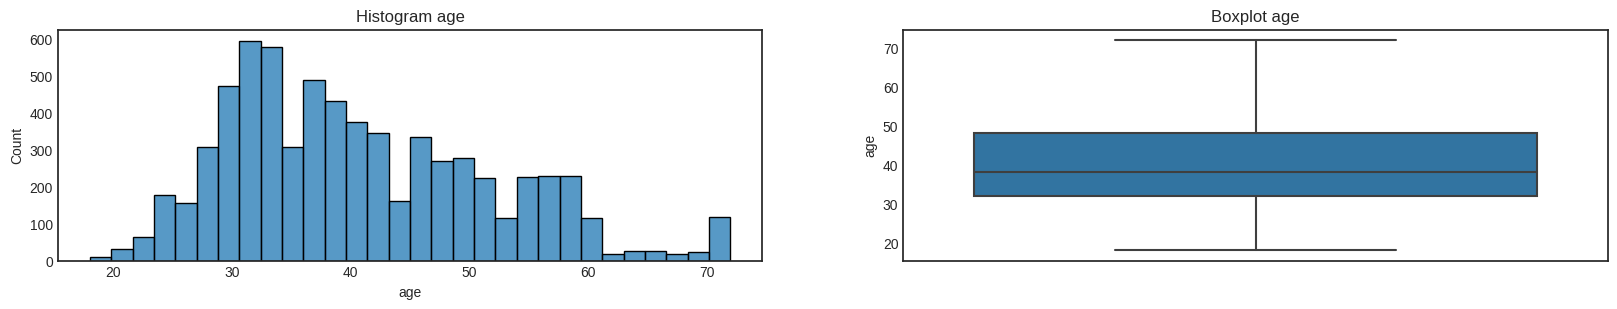

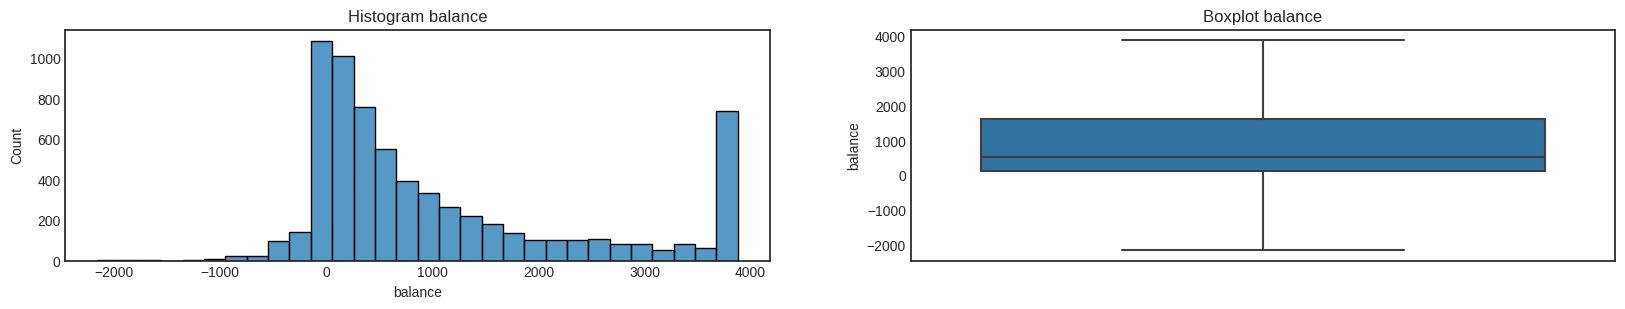

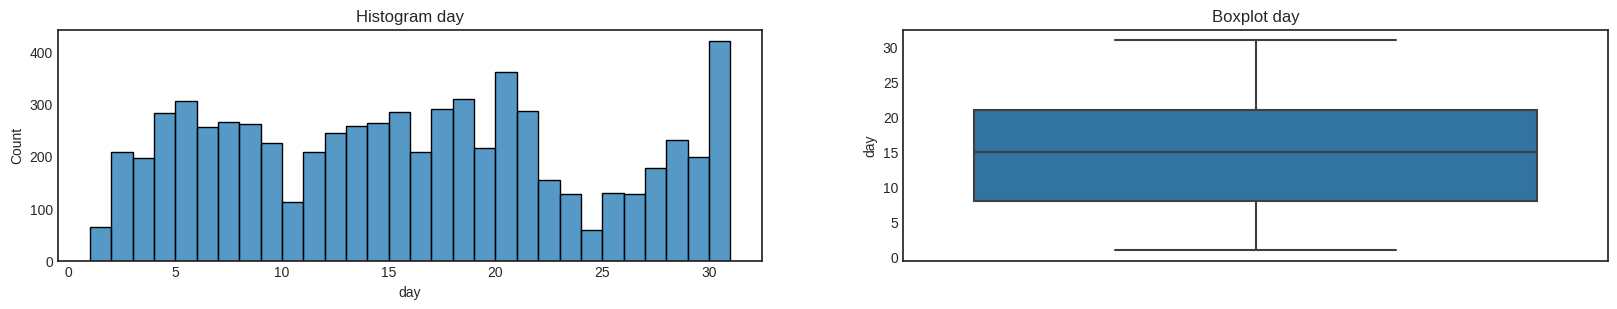

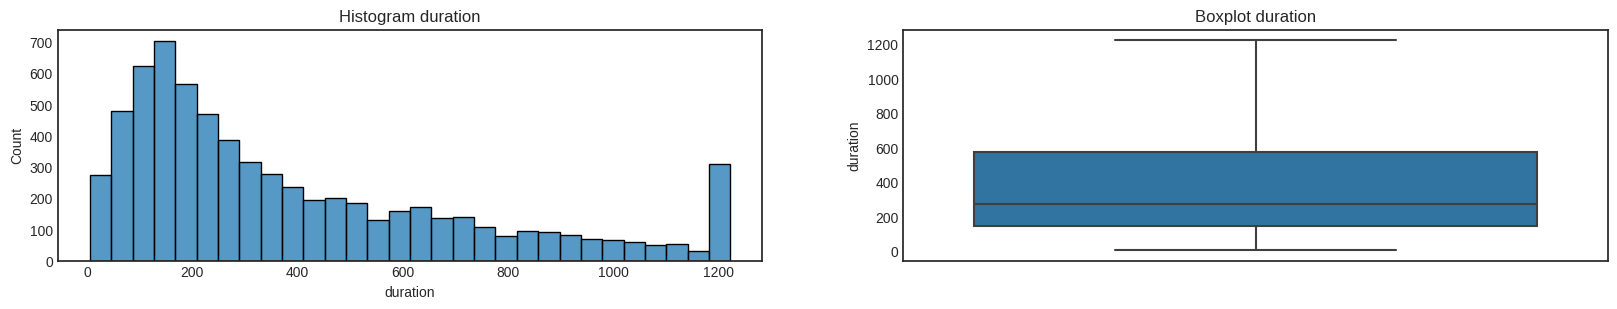

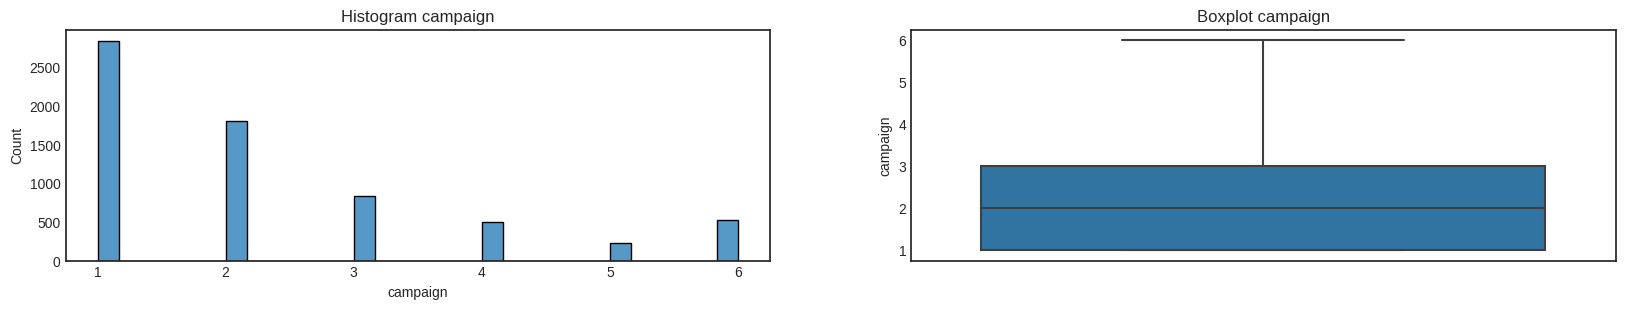

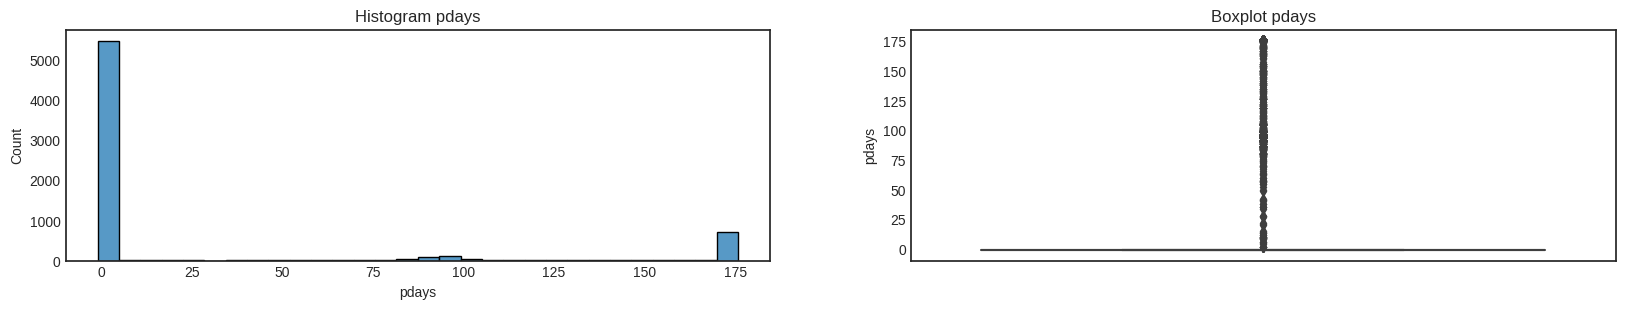

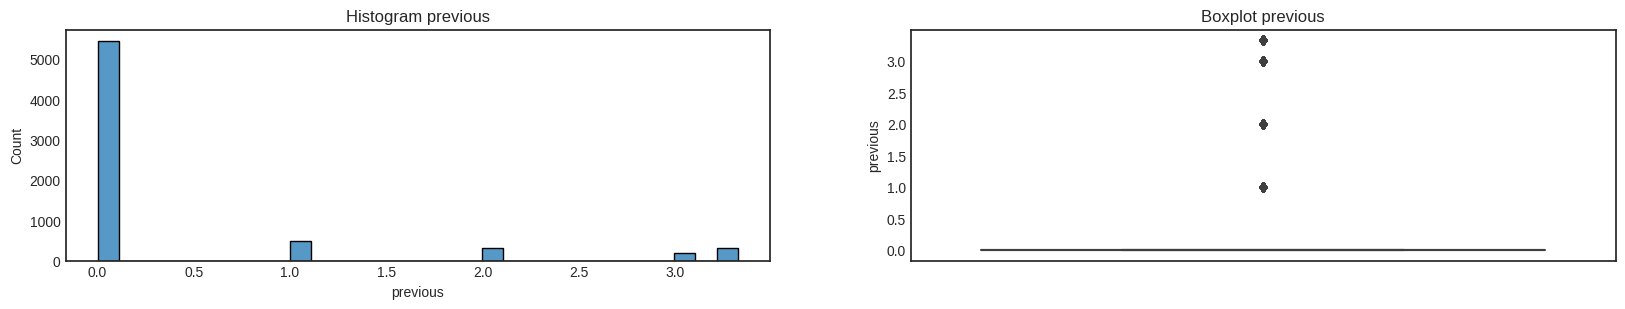

In [ ]:
#tampilkan distribusi dari masing-masing numerik-outlier
for i in check_outlier_columns :
    diagnostic_plots(X_train_clean, i)

### 5-6 Cek cardinality

Sebelum melakukan feature selection, perlu dilakukan pengecekan tingkat cardinality pada data kategori.

In [ ]:
#Tampilkan nama kolom dari data objek keseluruhan pada X_train sebagai patokan
data_categorical=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']
data_categorical

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

In [ ]:
#cek jumlah cardinality
print('Jumlah Kolom dan baris: ', X_train_clean[data_categorical].shape)
print('')

for col in X_train_clean[data_categorical].columns.tolist():
  print('Col : ', col)
  print('Jumlah data unik : ', X_train_clean[data_categorical][col].nunique())

Jumlah Kolom dan baris:  (6733, 7)

Col :  job
Jumlah data unik :  12
Col :  marital
Jumlah data unik :  3
Col :  education
Jumlah data unik :  4
Col :  default
Jumlah data unik :  2
Col :  housing
Jumlah data unik :  2
Col :  loan
Jumlah data unik :  2
Col :  month
Jumlah data unik :  12


Berdasarkan pengecekan cardinality, feature 'month' dan 'day' merupakan fitur yang sama dan dapat digabung. Sehingga perlu dilakukan penggabungan dan kedua fitur tersebut akan di-drop.

In [ ]:
#drop feature redundant dan tinggi cardinality
redundant_drop = ['ID']
X_train_clean.drop(columns=redundant_drop,inplace=True)
X_test.drop(columns=redundant_drop,inplace=True)

#tampilkan jumlah data dan kolom pada train-set
print('X_train:',X_train_clean.shape)
print('X_test:',X_test.shape)

X_train: (6733, 15)
X_test: (1189, 15)


In [ ]:
#Tampilkan nama kolom dari data objek keseluruhan setelah id di drop
data_categorical=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']
data_categorical

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

### 5-7 Feature Selection

Feature selection adalah proses untuk mengurangi jumlah variabel input ketika melakukan prediksi pemodelan. Feature selection akan dilakukan pada data numerik (numerical feature) dan data kategorikal(categorical features).

- Pada numerical feature, teknik korelasi yang digunakan adalah :
  - ANOVA / korelasi linear.
- Sementara pada categorical feature, teknik yang digunakan adalah:
  - Chi-Squared test (tabel kontigensi) ([reference](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/))

In [ ]:
#1.copy variabel data agar tidak hilang menjadi _fs(feature selection)
X_train_fs= X_train_clean.copy()
y_train_fs= y_train.copy()

In [ ]:
X_train_fs.reset_index(drop=True)
y_train_fs.reset_index(drop=True)

0       0
1       0
2       0
3       0
4       1
       ..
6728    1
6729    1
6730    0
6731    0
6732    1
Name: term_deposit, Length: 6733, dtype: int64

Selanjutnya,tentukan mana fitur numerik dan kategorikal. Dilakukan secara manual karena terdapat data bertipe integer, namun sebenarnya data tersebut adalah kategorikal.

In [ ]:
#2.panggil nama fitur terhadap tipe datanya
fs_numerik = ['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous', 'last_contact_day']
fs_kategorik = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

Sebelum dilakukan Feature Selection Perlu dilakukan scaling dan encoding untuk dapat diproses dengan teknik ANOVA dan chi-squares.

Tipe encoding yang digunakan adalah MinMaxScaller karena data yang dihasilkan sama seperti data setelah di handling outlier (terdistribusi normal). Sementara itu, encoding yang digunakan adalah LabelEncoding karena ingin langsung mengubah data sesuai dengan fitur yang ada pada variabel, tanpa menambah/mengurangi fitur.

In [ ]:
#3.pisahkan data numerik dan kolom pada X_train_fs
X_train_numerik = X_train_fs[fs_numerik]
X_train_kategorik = X_train_fs[fs_kategorik]

In [ ]:
#4.lakukan scaling dan encoding
scaler_fs = MinMaxScaler()
#5.fit transform train kategorik
fs_encode= X_train_kategorik.apply(LabelEncoder().fit_transform)
#6.fit transform train numerik
fs_scaled = pd.DataFrame(scaler_fs.fit_transform(X_train_numerik),columns= fs_numerik, index=X_train_numerik.index)

##### Feature Selection Numerik

Digunakan metode f_classif (ANOVA) untuk menghitung korelasi antara fitur numerik dan kategorikal.

Berikut adalah hipotesis 0 dan hipotesis 1 dengan (alpha: 0.05, confidence level : 0.95)

H0= tidak ada perbedaan variansi sinifikan pada target

H1= ada perbedaan variansi yang sinifikan pada target

In [ ]:
#1. definisikan anova
select_numerik = SelectKBest(score_func=f_classif, k='all')
#2. fit data yang telah discaling dengan y_train
score_numerik = select_numerik.fit(fs_scaled, y_train)

In [ ]:
#3. Selanjutnya adalah print score, mean score dan feature
print('Score setiap feature: ', score_numerik.scores_)
print('Rata-Rata score: ', score_numerik.scores_.mean())
#4. Kemudian pembuatan dataframe untuk mempermudah interpretasi
df_score_num = pd.DataFrame([X_train_fs[fs_numerik].keys(),score_numerik.scores_,score_numerik.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
#5.buat batas sesuai dengan hipotesis yang didefinisikan
df_score_num['Hasil hipotesis'] = np.where(df_score_num['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score setiap feature:  [1.41217567e+00 1.15414051e+02 5.49887781e+00 2.59587175e+03
 8.36406625e+01 6.10382895e+01 7.34541497e+01 3.20012926e+01]
Rata-Rata score:  371.0414056113368


In [ ]:
#6. Tampilkan data score
df_score_num.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,Hasil hipotesis
0,duration,2595.871746,0.0,H1 diterima/Berpengaruh
1,balance,115.414051,0.0,H1 diterima/Berpengaruh
2,campaign,83.640663,0.0,H1 diterima/Berpengaruh
3,previous,73.45415,0.0,H1 diterima/Berpengaruh
4,pdays,61.03829,0.0,H1 diterima/Berpengaruh
5,last_contact_day,32.001293,0.0,H1 diterima/Berpengaruh
6,day,5.498878,0.019058,H1 diterima/Berpengaruh
7,age,1.412176,0.234737,H0 diterima/Tidak Berpengaruh


Observasi:
- `age` tidak mempengaruhi fitur sehingga perlu didrop
- `pdays` memiliki banyak nilai outlier sehingga perlu di drop

In [ ]:
#7.drop data pada X_train, X_val danX X_test
fs_drop_num = ['day']
X_train_clean.drop(columns=fs_drop_num,inplace=True)
X_test.drop(columns=fs_drop_num,inplace=True)

In [ ]:
#8.tampilkan jumlah data dan kolom pada train-set
print('Data sebelum feature selection numerik:')
print('df:', df.shape)
print('Data sesudah feature selection numerik:')
print('X_train:',X_train_clean.shape)
print('X_test:',X_test.shape)

Data sebelum feature selection numerik:
df: (7922, 17)
Data sesudah feature selection numerik:
X_train: (6733, 14)
X_test: (1189, 14)


Fitur data pada train, val dan test berubah menjadi 21 yang awalnya berjumlah 22 fitur.

#### Feature Selection Kategorikal

Karena teknik yang digunakan adalah chi-square, sehingga perlu bantuan `SelectKBest` dan `chi2`package untuk menghitung korelasi antara fitur kategorikal dengan `term_deposit`. Dengan, (alpha: 0.05, confidence interval: 0.95) dan Hipotesis sebagai berikut:

H0 = Tidak terdapat proporsi signifikan terhadap target

H1 = terdapat proporsi signifikan terhada target

In [ ]:
#1. definisikan SelecKbest dengan variabel yang telah di encode
select_kategorikal = SelectKBest(score_func=chi2, k='all')
#2. fit data fs_encode dengan y_train
score_cat = select_kategorikal.fit(fs_encode , y_train)
#3. Tampilkan skor tiap fitur dan rata-rata nilai skornya
print('Score tiap fitur:', score_cat.scores_)
print('Rata-rata score: ', score_cat.scores_.mean())

Score tiap fitur: [ 50.3879673   16.96706052  20.70470283  10.80208078 102.0273294
  59.35363037  42.34650287]
Rata-rata score:  43.227039154743316


In [ ]:
#4. Membuat dataframe sesuai dengan hipotesis
df_score_cat = pd.DataFrame([X_train_kategorik.columns,score_cat.scores_,score_cat.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
df_score_cat['Hasil hipotesis'] = np.where(df_score_cat['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')
#5. tampilkan data hasil periksa hipotesis
df_score_cat.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,Hasil hipotesis
0,housing,102.027329,0.0,H1 diterima/Berpengaruh
1,loan,59.35363,0.0,H1 diterima/Berpengaruh
2,job,50.387967,0.0,H1 diterima/Berpengaruh
3,month,42.346503,0.0,H1 diterima/Berpengaruh
4,education,20.704703,0.000005,H1 diterima/Berpengaruh
5,marital,16.967061,0.000038,H1 diterima/Berpengaruh
6,default,10.802081,0.001014,H1 diterima/Berpengaruh


Berdasarkan data yang telah diuji dengan chi2, semua fitur berpengaruh terhadap term_deposit. Namun, setelah diobservasi kembali, berdasarkan personal judge,default tidak berpengaruh kepada term_deposit. Oleh karena itu, fitur tersebut akan di drop

In [ ]:
#1. panggil nama fitur yang akan didrop
fs_drop_cat = ['month']
#2. drop fitur pada train, val dan test set
X_train_clean.drop(columns=fs_drop_cat,inplace=True)
X_test.drop(columns=fs_drop_cat,inplace=True)

In [ ]:
#3. tampilkan jumlah data dan kolom pada train-set
print('Data sebelum feature selection numerik:')
print('df:', df.shape)
print('Data sesudah feature selection numerik:')
print('X_train_clean:',X_train_clean.shape)
print('X_test:',X_test.shape)

Data sebelum feature selection numerik:
df: (7922, 17)
Data sesudah feature selection numerik:
X_train_clean: (6733, 13)
X_test: (1189, 13)


Setelah dilakukan feature selection numerikal dan kategorikal, total fitur yang akan dimodelkan adalah sebanyak 11 fitur dari 22 fitur.

### 5-8 Pipeline Scaling & Encoding

Selanjutnya dilakukan pipeline untuk scaling dan encoding data sebelum dimodelkan. Namun sebelum itu, perlu dilakukan pengecekan skeweness pada feature numerical dan mengecek feature categorical yang nominal dan ordinal.

- Scaling

In [ ]:
#1. cek besar skewness pada masing-masing fitur numerik
for i in ['balance', 'duration', 'campaign', 'previous', 'last_contact_day']:
    print('Skew Feature',i,':' ,X_train_clean[i].skew())

Skew Feature balance : 1.09530610302018
Skew Feature duration : 1.0977072965927681
Skew Feature campaign : 1.2214681119785256
Skew Feature previous : 2.30614440333203
Skew Feature last_contact_day : 0.3320274084966234


In [ ]:
#tampilkan data unique pada kolom kategorikal
df_cat=X_train_clean[['job', 'marital', 'education','housing', 'loan']]
for i in df_cat.columns:
    z = df[i].unique()
    print(i,':',z)

job : ['management' 'student' 'technician' 'admin.' 'blue-collar'
 'self-employed' 'services' 'retired' 'unemployed' 'housemaid'
 'entrepreneur' 'unknown']
marital : [1 2 0]
education : ['tertiary' 'secondary' 'unknown' 'primary']
housing : [1 0]
loan : [0 1]


Karena tidak ada fitur dengan ekstrim skew, maka digunakan **MinMaxScaler**.

* Encoding
     Terdapat 1 fitur ordinal dan 5 data nominal, diantaranya:
     - nominal: `'job', 'month'`
      - teknik yang digunakan adalah **OneHotEncoder**
     - Ordinal:`'education'`
      - teknik yang digunakan adalah **OrdinalEncoder**

In [ ]:
X_train_clean.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,last_contact_day
255,50,retired,1,primary,0,208.0,0,0,51.0,1,-1.000000,0.0,160
3872,37,technician,2,secondary,0,494.0,1,0,247.0,2,175.800116,3.0,33
2879,36,services,2,secondary,0,-302.0,1,0,36.0,2,-1.000000,0.0,133
2382,34,technician,1,secondary,0,2683.0,0,0,73.0,2,-1.000000,0.0,209
5407,50,unemployed,0,unknown,0,1088.0,0,0,749.0,1,-1.000000,0.0,33


In [ ]:
# Definisi data final untuk pre-processing
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
# 1.Numerikal Pre-Processing
num_columns_final = ['age','balance','last_contact_day', 'duration', 'campaign','pdays', 'previous']
numerical_transformer = MinMaxScaler()

# 2.Categorical Nominal Pre-Processing
cat_nom_columns_final = ['job','marital','housing', 'loan', 'default']
nominal_transformer = OneHotEncoder()

#3. Categorical Ordinal Pre-Processing
membership_order = ['primary', 'secondary','tertiary', 'unknown']
cat_ord_columns_final = ['education']
ordinal_transformer = OrdinalEncoder(categories=[membership_order])

#4. masukkan ke pipeline dengan columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_columns_final),
        ("nom", nominal_transformer, cat_nom_columns_final),
        ("ord", ordinal_transformer, cat_ord_columns_final),
    ]
)

#5. Fit_transform data train dan Transform X_val dan X_test
X_train_final = preprocessor.fit_transform(X_train_clean)
X_test_final = preprocessor.transform(X_test)

6. #tampilkan masing_masing jumlah kolom dan baris
print('X_train_final:', X_train_final.shape)
print('X_test_final:', X_test_final.shape)

X_train_final: (6733, 29)
X_test_final: (1189, 29)


Selanjutnya, tampilkan isi data pada masing-masing X-set

In [ ]:
#7.tampilkan data
#tampilkan data X_train_final
X_train_final

array([[0.59259259, 0.39173294, 0.42857143, ..., 1.        , 0.        ,
        0.        ],
       [0.35185185, 0.43911531, 0.07282913, ..., 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.30723989, 0.35294118, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.22222222, 0.36025514, 0.87955182, ..., 1.        , 0.        ,
        1.        ],
       [0.66666667, 0.37781643, 0.64985994, ..., 1.        , 0.        ,
        2.        ],
       [0.38888889, 0.57380716, 0.83193277, ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
#tampilkan data X_test_final
X_test_final

array([[0.64814815, 0.45303181, 0.65546218, ..., 1.        , 0.        ,
        1.        ],
       [0.62962963, 0.27973824, 0.50980392, ..., 0.        , 1.        ,
        2.        ],
       [0.33333333, 0.38378065, 0.06442577, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.27777778, 0.42122266, 0.86554622, ..., 1.        , 0.        ,
        1.        ],
       [0.31481481, 0.50902916, 0.3557423 , ..., 1.        , 0.        ,
        2.        ],
       [0.25925926, 0.80193837, 0.36694678, ..., 1.        , 0.        ,
        2.        ]])

## 6 Model Definition

### Model Machine Learning

#### Pipeline

Pada kasus ini akan dilakukan pemodelan menggunakan pipeline. Pipeline merupakan alur kerja dalam menerapkan machine learning. Tujuannya adalah untuk membagi tugas pembelajaran mesin lengkap menjadi alur kerja yang berhubungan satu sama lain.

Pada pipeline ini, preprocessing (feature scaling dan encoding) dimasukkan dalam alur pipeline dan diproses dalam satu kesatuan dengan algoritma pemodelan yang digunakan.

- Feature Scaling

  - Feature Scaling adalah suatu cara untuk membuat numerikal data pada dataset memiliki rentang nilai yang sama.

  - Feature scaling yang digunakan pada kasus ini adalah RobustScaler karena data yang digunakan memiliki distribusi data yang skewed. RobusScaler hampir mirip dengan standardScaler, namun scalingnya menggunakan nilai median dan quartiles, tujuannya agar tidak rentan terhadap outlier.

- Feature Encoding
  - Feature Encoding adalah salah satu tahap preprocessing untuk mengubah data kategorikal/objek menjadi angka agar dapat diproses pada algoritma pemodelan.
  - feature scaling yang digunakan pada kasus ini adalah OneHotEncoding. OneHotEncoding untuk mengubah seluruh data kategorikal menjadi nilai boleean

#### Algoritma Pemodelan

Algoritma yang digunakan pada analisis ini adalah **Logistic Regression,  Decision Tree, RandomForest, XGBoosting Classifier, CatBoost Classifier, Gradient Boosting dan Gausssian classifier**. Algoritma ini akan digunakan untuk mengklasifikasikan data dengan tujuan untuk mengetahui apakah klien bank akan subscribe atau tidak pada term deposit.

- Logistic Regression merupakan algoritma supervised learning yang memanfaatkan fungsi linear untuk mendapatkan outputnya dalam bentuk klasifikasi. Algoritma ini diuji karena selain mudah untuk diimplementasikan, model ini sangat efisien dan cepat dalam memodelkan data.
Meskipun demikian, karena sifatnya yang tidak adaptif, sehingga kemungkinan  tingkat akurasi pada model juga akan tidak terlalu tinggi. Parameter-parameter yang digunakan menggunakan random_state=1
  Berikut adalah parameter yang digunakan pada logistic regression.
    - libliear karena solver ini direkomendasikan untuk dataset yang sangat besar dan memiliki dimensi yang besar juga
    - l1: fungsi penalti dengan menjumlahkan nilai akar parameter agar hasilnya semakin kecil

    - Parameter Baseline Logistic Regression:
      - >`penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None`

    - Parameter tuning Logistic Regression:
      - >`Best Hyperparameters Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}`


- Pemodelan diuji dengan algoritma DecisionTree karena algoritma ini tidak terpengaruh oleh oulier serta data null dan dapat bekerja dengan baik terhadap data non-linear. Decision tree bekerja dengan mem-break down dataset yang kompleks untuk dibagi-bagi menjadi klasifikasi yang lebih simple.Sehingga pengambilan keputusan/pengklasifikasiannya menjadi lebih akurat.

   Parameter utama yang digunakan adalah criterion: entropy yaitu dilakukan dengan mengukur ketidakpastian suatu nilai acak dengan maximum kedalaman (depth) sebanyak 2.

    - Baseline parameter:
      - >`*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0`



- KKN yaitu pemodelan yang memanfaatkan jarak antara data untuk mengelompokkan suatu objek data tersebut. KKN digunakan karena model ini memiliki waktu training yang cepat dan dapat menjadi model baseline untuk model lainnya. Jika model ini memiliki peforma yang baik, maka kemungkinan model yang lainnya juga akan memiliki peforma yang baik juga.

    - Baseline parameter:
      - >`n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None`


- Pemodelan randomforest ini sangat baik untuk data dengan jumlah besar serta dapat mengurangi banyak noise dan outlier, overfitting, mengurangi variansi dan improve akurasi model. Pemodelan ini bekerja dengan memilih hasil predikasi terbanyak dari leaf.

    - Baseline parameter:
      - >`n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None`
- Pemodelan Gradient Boosting bekerja dengan membangun satu tree untuk menyesuaikan data, lalu tree berikutnya dibangun untuk mengurangi residual (error). Pemodelan ini diuji karena memiliki training yang cepat dan lebih efisien, membutuhkan memori yang lebih rendah dalam penggunaannya, menghasilkan akurasi yang lebih baik dan mampu mengatasi data yang besar.
    - Baseline Parameter:
    - >`loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0`

- Pemodelan XGboosting (eXtrem Gradient Boosting) menggunakan pemodelan ensembled learning yang didasarkan dari algoritma decision tree yang tingkat gradiennya ditingkatkan dengan menggabungkan gradient boosting dengan random forest agar model dapat mengeksekusi dan memiliki peforma lebih baik. Teknik ini menjadi populer karena keampuhannya dalam menangani data yang kompleks, termasuk data yang memiliki noise atau kesalahan.

  - `booster= gbtree, silent=0, nthread=max,eta=0.3, min_child_weight=1, max_depth=6, max_leaf_nodes= n, gamma=0,  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, lambda=1, alpha=0, scale_pos_weight=1`

- Pemodelan CatBoost diuji karena pemodelan tersebut mudah digunakan, efisien, dan bekerja sangat baik dengan variabel kategorikal. Ini lebih cepat untuk digunakan daripada, katakanlah, XGBoost, karena tidak memerlukan penggunaan pra-pemrosesan data.

  ->`loss_function='Logloss',verbose = False,eval_metric='AUC',iterations=500,thread_count = None,random_state=SEED`

Metrics yang digunakan pada pemodelan ini diantaranya adalah `F1-Score`, `Cross Validation`
  - `F1 score` digunakan karena model perlu meninjau FP (false positif) dan FN (false negatif) yang akan mempengaruhi strategi bisnis dari bank tersebut. Jika terdapat nilai FN dan FP yang besar, kemungkinan model akan salah memprediksi klien yang subscribe dengan yang tidak subscribe juga besar. Berefek pada salah sasaran strategi bisnis dan penggunaan biaya marketing yang tidak efisien.
  - `cross validation` digunakan untuk validasi nilai `ROC-AUC ` pada training yang menunjukkan apakah nilai yang dihasilkan sudah sesuai dengan classification report atau belum.
  - Metrics `Accuracy` digunakan untuk mengetahui seberapa akurat model yang dibuat.
  

#### Null Accuracy

Sebelum melakukan pemodelan, sebaiknya dilakukan pengecekan nilai akurasi pada nilai null terlebih dahulu untuk mengetahui apakah pemodelan yang dilakukan sudah lebih baik sebelum dan sudah dilakukan pemodelan

In [ ]:
# hitung data y_test
y_test.value_counts()

1    603
0    586
Name: term_deposit, dtype: int64

In [ ]:
#tampilkan data null
null_accuracy= y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0])
null_accuracy

0.5071488645920942

Nilai akurasi model harus diatas 53% untuk dapat dikatakan pemodelan yang baik. Selanjutnya, perlu dilakukan pengecekan dengan confusion matrix untuk mengetahui performasi dari model dan jenis error yang dihasilkan oleh model.




---



### Model Deep learning

Berikut adalah model deep learning [Model Deep Learning]('https://github.com/destiratnakomala/Final-Project-FTDS-020/blob/main/Bank-Marketing-Term-Deposit/02_sub_desti_ratna_komala.ipynb')

## 7 Model Training

### Baseline Model

Setelah dilakukan training pada baseline model. Baseline model ini melakukan pemodelan dengan menggunakan default parameter yang dijadikan sebagai acuan untuk `model improvement`

In [ ]:
#define random_state
global_random_state=27

In [ ]:
#---------------------------------------------------

# Definisikan kolom-kolom yang akan digunakan
categorical_cols=['job', 'marital', 'education', 'default', 'housing', 'loan']
numerical_cols=[ 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'last_contact_day']

# Preprocessing pipeline
numerical_transformer = RobustScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Logistic Regression pipeline
logreg_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=global_random_state, max_iter=1000))

])

#DecisionTree pipeline
dectree_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=global_random_state))
])

# KKN pipeline
kkn_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# RandomForest pipeline
rf_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=global_random_state))
])

# RandomForest pipeline
xg_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=global_random_state))
])

#gradientboosting pipeline
gb_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=global_random_state))
])


# catboost pipeline
cat_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=global_random_state))
])

# RandomForest pipeline
mb_pipelineb = Pipeline(steps=[
        ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])


#---------------------------------------------------
# Train Keseluruhan data

# Train Logistic Regression
logreg_pipelineb.fit(X_train, y_train)
# Train Decision Tree
dectree_pipelineb.fit(X_train, y_train)
# Train kkn
kkn_pipelineb.fit(X_train, y_train)
#Train random Forest
rf_pipelineb.fit(X_train, y_train)
#train XGBoost
xg_pipelineb.fit(X_train, y_train)
# Train Gradient Boosting
gb_pipelineb.fit(X_train, y_train)
#Train CatBoost
cat_pipelineb.fit(X_train, y_train)
#Train Gaussian
mb_pipelineb.fit(X_train, y_train)

Learning rate set to 0.023258
0:	learn: 0.6819818	total: 50.6ms	remaining: 50.5s
1:	learn: 0.6702748	total: 54.2ms	remaining: 27s
2:	learn: 0.6596764	total: 57.8ms	remaining: 19.2s
3:	learn: 0.6494464	total: 61.4ms	remaining: 15.3s
4:	learn: 0.6397419	total: 65.1ms	remaining: 13s
5:	learn: 0.6290609	total: 69.8ms	remaining: 11.6s
6:	learn: 0.6205874	total: 73.5ms	remaining: 10.4s
7:	learn: 0.6131668	total: 77.3ms	remaining: 9.58s
8:	learn: 0.6047231	total: 80.9ms	remaining: 8.91s
9:	learn: 0.5972418	total: 84.5ms	remaining: 8.37s
10:	learn: 0.5905097	total: 90.7ms	remaining: 8.16s
11:	learn: 0.5821866	total: 94.3ms	remaining: 7.77s
12:	learn: 0.5750558	total: 97.9ms	remaining: 7.43s
13:	learn: 0.5683588	total: 101ms	remaining: 7.14s
14:	learn: 0.5616322	total: 105ms	remaining: 6.9s
15:	learn: 0.5551551	total: 109ms	remaining: 6.7s
16:	learn: 0.5489781	total: 113ms	remaining: 6.52s
17:	learn: 0.5422375	total: 116ms	remaining: 6.35s
18:	learn: 0.5369782	total: 120ms	remaining: 6.2s
19:	l

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous',
                                                   'last_contact_day']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan'])])),
                ('classifier', GaussianNB())])

### Improvement Model

Selanjutnya dilakukan hyperparameter, gridsearch serta cross validation untuk meningkatkan metriks evalusi model baseline.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#---------------------------------------------------
# Hyperparameter grid untuk decisiontree
dectree_param_grid = {
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__ccp_alpha': [*np.arange(0, 1, 0.001)],
}


#---------------------------------------------------
# Hyperparameter grid untuk cat

cat_param_grid = {
        'classifier__iterations': np.arange(10, 50, 100),
        'classifier__depth': np.arange(2, 16, 2),
        'classifier__learning_rate': [0.01, 0.05, 0.1]
    }

#---------------------------------------------------
# Hyperparameter grid untuk XG
xg_param_grid = {
    'classifier__n_estimators': [100, 400],
    'classifier__max_depth': [3, 6],
    'classifier__learning_rate': [0.05, 0.20],
    'classifier__min_child_weight': [1, 10]
}



In [ ]:
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

#### Best Parmeter Decision Tree

In [ ]:
#Gridsearch for the best parameter
dectree_grid_search = GridSearchCV(dectree_pipelineb, dectree_param_grid, scoring = 'roc_auc', refit = True, cv=CV, verbose=1)
xg_grid_search = GridSearchCV(xg_pipelineb, xg_param_grid,  scoring = 'roc_auc', refit = True, cv=CV, verbose=1)
cat_grid_search = GridSearchCV(cat_pipelineb, cat_param_grid, scoring = 'roc_auc', refit = True, cv=CV, verbose=1)

In [ ]:
#fit gridsearch
dectree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'last_contact_day']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan'])])),
                                       ('classifier',
                                        Decis...
             param_grid={'classifier__ccp_alpha': [0.0, 0.001, 0.002, 0.003,
                                                   0.004, 0.005, 0.006, 0.007,
                                                   0.008, 0.009000000000000001,
                                                   0.01, 0.011, 0.012,
                                                   0.013000000000000001, 0.014,
                                                   0.015, 0.016, 0.017,
                                                   0.018000000000000002, 0.019,
                                                   0.02, 0.021, 0.022, 0.023,
                                                   0.024, 0.025,
                                                   0.026000000000000002, 0.027,
                                                   0.028, 0.029, ...],
                         'classifier__max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc', verbose=1)

In [ ]:
# Best hyperparameters untuk Decision Tree
dectree_best_estimator = dectree_grid_search.best_estimator_
dectree_best_params = dectree_grid_search.best_params_
print("Best Hyperparameters Decision Tree:", dectree_best_params)

Best Hyperparameters Decision Tree: {'classifier__ccp_alpha': 0.001, 'classifier__max_features': 'auto'}


#### Best Parmeter Catboosting Gradient

In [ ]:
#fit cat grid
cat_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
0:	learn: 0.6899807	total: 1.83ms	remaining: 16.5ms
1:	learn: 0.6868619	total: 3.57ms	remaining: 14.3ms
2:	learn: 0.6839541	total: 5.33ms	remaining: 12.4ms
3:	learn: 0.6812756	total: 7.04ms	remaining: 10.6ms
4:	learn: 0.6780119	total: 8.81ms	remaining: 8.81ms
5:	learn: 0.6753954	total: 10.5ms	remaining: 7ms
6:	learn: 0.6723175	total: 12.2ms	remaining: 5.23ms
7:	learn: 0.6694033	total: 13.8ms	remaining: 3.46ms
8:	learn: 0.6665443	total: 15.5ms	remaining: 1.72ms
9:	learn: 0.6637604	total: 17.1ms	remaining: 0us
0:	learn: 0.6896134	total: 1.87ms	remaining: 16.9ms
1:	learn: 0.6861194	total: 3.74ms	remaining: 15ms
2:	learn: 0.6830641	total: 5.53ms	remaining: 12.9ms
3:	learn: 0.6802457	total: 7.2ms	remaining: 10.8ms
4:	learn: 0.6771522	total: 9.14ms	remaining: 9.14ms
5:	learn: 0.6736236	total: 10.9ms	remaining: 7.28ms
6:	learn: 0.6706316	total: 12.8ms	remaining: 5.48ms
7:	learn: 0.6675215	total: 14.8ms	remaining: 3.69ms
8:	learn: 0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'last_contact_day']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan'])])),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x7bcb91222380>)]),
             param_grid={'classifier__depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'classifier__iterations': array([10]),
                         'classifier__learning_rate': [0.01, 0.05, 0.1]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Best hyperparameters untuk catboosting
cat_best_estimator = cat_grid_search.best_estimator_
cat_best_params = cat_grid_search.best_params_
print("Best Hyperparameters catboosting:",cat_best_params)

Best Hyperparameters catboosting: {'classifier__depth': 12, 'classifier__iterations': 10, 'classifier__learning_rate': 0.1}


#### Best Parmeter XGboosting Gradient

In [ ]:
#fit data
xg_grid_search.fit(X_train, y_train)

In [ ]:
# Best hyperparameters untuk XG boosting
xg_best_estimator = xg_grid_search.best_estimator_
xg_best_params = xg_grid_search.best_params_
print("Best Hyperparameters xgboosting:", xg_best_params)

Best Hyperparameters xgboosting: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 6, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 400}


## 8 - Model Evaluation

Selanjutnya adalah model evaluation & model selection. Evaluasi dilakukan pada 7 model. Kemudian akan dipilih model yang terbaik untuk dilakukan *hyperparameter tuning*

### 8-1 Baseline Model

#### Def Evaluation

In [ ]:
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)

In [ ]:
def metrics_scoring_table(y_model,y_true, y_proba, model_name):
    prec = precision_score(y_true, y_model)
    accu = accuracy_score( y_true, y_model)
    recall = recall_score(y_true, y_model)
    f1 = f1_score(y_true, y_model)
    roc = roc_auc_score(y_true, y_proba[:, 1])
    df_score = pd.DataFrame(data= {
    "model" :  model_name,
    "accuracy score": accu,
    "precision score": prec,
    "recall score": recall,
    "f1-score": f1,
    "ROC-AUC": roc
    },
    index = [0]
    )
    return df_score

In [ ]:
def roc_curve_plot(Y_pred, Y_true, Y_pred_pobablities, model_name):
    Y_pp = Y_pred_pobablities[:, 1]
    fpr, tpr, threshold1 = roc_curve(Y_true, Y_pp )

    fig, ax = plt.subplots(nrows=1, ncols= 1, figsize = (7,5), constrained_layout = True)
    ax.plot(fpr, tpr, label='ROC Score: {:.5f}'.format(roc_auc_score(Y_true, Y_pp)))
    ax.set_title(f"{model_name} ROC Curve ", fontdict = {"fontsize": 18})
    ax.set_xlabel("False Positive Rate", fontdict = {"fontsize": 15} )
    ax.set_ylabel("True Positive Rate", fontdict = {"fontsize": 15})
    ax.legend(loc = 4, fontsize = 14 )
    plt.style.use("seaborn-white")

    plt.show()


In [ ]:
def roc_summary_plot(Y_true, Y_probability = [], model_name = []):
    for i in range(len(Y_probability)):
        fpr, tpr, threshold1 = roc_curve(Y_true,Y_probability[i][:,1] )
        plt.style.use("seaborn-white")
        plt.figure( num = 1, figsize = (12, 9))
        plt.title("ROC scores summary", fontsize = 18)
        plt.xlabel("False Positive Rate" , fontdict = {"fontsize": 15})
        plt.ylabel("True Positive Rate" , fontdict = {"fontsize": 15})
        plt.plot(fpr, tpr, label='{0} ROC Score: {1}'.format(model_name[i] ,round(roc_auc_score(Y_true, Y_probability[i][:,1] ) ,2)))
        plt.legend(loc = 4, fontsize =13)
        plt.style.use("seaborn-white")
    plt.show()

#### Evaluasi Logistic regression

In [ ]:
# Predict Train-Set
logreg_pred_trainb = logreg_pipelineb.predict(X_train)
logreg_probat=logreg_pipelineb.predict_proba(X_train)

# Predict Test-set
logreg_predb = logreg_pipelineb.predict(X_test)
logreg_proba= logreg_pipelineb.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(logreg_pred_trainb,y_train, logreg_probat, "LogisticRegression-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression-Train,0.794445,0.81116,0.76623,0.788055,0.873106


In [ ]:
#score
metrics_scoring_table(logreg_predb,y_test, logreg_proba, "LogisticRegression")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression,0.79815,0.815652,0.777778,0.796265,0.876086


#### Evaluasi kkn

In [ ]:
# Predict Train-Set
kkn_pred_trainb = kkn_pipelineb.predict(X_train)
kkn_probat=kkn_pipelineb.predict_proba(X_train)

# Predict Test-set
kkn_predb = kkn_pipelineb.predict(X_test)
kkn_proba= kkn_pipelineb.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(kkn_pred_trainb,y_train, kkn_probat, "KKN-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,KKN-Train,0.83722,0.845027,0.824896,0.83484,0.917613


In [ ]:
#score
metrics_scoring_table(kkn_predb,y_test, kkn_proba, "KKN-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,KKN-Test,0.765349,0.793478,0.726368,0.758442,0.827918


#### Evaluasi Decision Tree

In [ ]:
# Predict Train-Set
dectree_pred_trainb = dectree_pipelineb.predict(X_train)
dectree_probat=dectree_pipelineb.predict_proba(X_train)

# Predict Test-set
dectree_predb =dectree_pipelineb.predict(X_test)
dectree_proba= dectree_pipelineb.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(dectree_pred_trainb,y_train, dectree_probat, "Decision Tree-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Train,1.0,1.0,1.0,1.0,1.0


In [ ]:
#score
metrics_scoring_table(dectree_predb,y_test, dectree_proba, "Decision Tree-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Test,0.808242,0.819421,0.797678,0.808403,0.808395


#### Evaluasi Random Forest

In [ ]:
# Predict Train-Set
rf_pred_trainb = rf_pipelineb.predict(X_train)
rf_probat=rf_pipelineb.predict_proba(X_train)

# Predict Test-set
rf_predb =rf_pipelineb.predict(X_test)
rf_proba= rf_pipelineb.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(rf_pred_trainb,y_train, rf_probat, "Decision Tree-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Train,1.0,1.0,1.0,1.0,1.0


In [ ]:
#score
metrics_scoring_table(rf_predb,y_test, rf_proba, "Random Forest")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Random Forest,0.860387,0.863561,0.860697,0.862126,0.918411


#### Evaluasi XGBoosting

In [ ]:
# Predict Train-Set
xg_pred_trainb = xg_pipelineb.predict(X_train)
xg_probat=xg_pipelineb.predict_proba(X_train)

# Predict Test-set
xg_predb =xg_pipelineb.predict(X_test)
xg_proba= xg_pipelineb.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(xg_pred_trainb,y_train, xg_probat, "Decision Tree-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Train,0.969553,0.963813,0.975581,0.969661,0.996187


In [ ]:
#score
metrics_scoring_table(xg_predb,y_test, xg_proba, "Decision Tree-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Test,0.882254,0.880131,0.888889,0.884488,0.935853


#### Evaluasi GB

In [ ]:
# Predict Train-Set
gb_pred_trainb = gb_pipelineb.predict(X_train)
gb_probat=gb_pipelineb.predict_proba(X_train)

# Predict Test-set
gb_predb =gb_pipelineb.predict(X_test)
gb_proba= gb_pipelineb.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(gb_pred_trainb,y_train, gb_probat, "Gradient Boosting-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Gradient Boosting-Train,0.869895,0.862653,0.879095,0.870796,0.940503


In [ ]:
#score
metrics_scoring_table(gb_predb,y_test, gb_proba, "Gradient Boosting-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Gradient Boosting-Test,0.870479,0.869852,0.875622,0.872727,0.927496


#### Evaluasi CatBoosting

In [ ]:
# Predict Train-Set
cat_pred_trainb = cat_pipelineb.predict(X_train)
cat_probat=cat_pipelineb.predict_proba(X_train)

# Predict Test-set
cat_predb =cat_pipelineb.predict(X_test)
cat_proba= cat_pipelineb.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(cat_pred_trainb,y_train, cat_probat, "CatBoosting-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,CatBoosting-Train,0.913263,0.902496,0.926147,0.914168,0.974353


In [ ]:
#score
metrics_scoring_table(cat_predb,y_test, cat_proba, "CATBoosting-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,CATBoosting-Test,0.881413,0.877451,0.890547,0.883951,0.937384


#### Evaluasi MB

In [ ]:
# Predict Train-Set
mb_pred_trainb = mb_pipelineb.predict(X_train)
mb_probat=mb_pipelineb.predict_proba(X_train)

# Predict Test-set
mb_predb =mb_pipelineb.predict(X_test)
mb_proba= mb_pipelineb.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(mb_pred_trainb,y_train, mb_probat, "Gaussian-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Gaussian-Train,0.725828,0.716619,0.744789,0.730432,0.785071


In [ ]:
#score
metrics_scoring_table(mb_predb,y_test, mb_proba, "gaussian-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,gaussian-Test,0.726661,0.727124,0.737977,0.73251,0.783925


### 8-2 Tuning Model

#### Evaluasi Decision Tree

In [ ]:
# Predict Train-Set
dectree_pred_trainbh = dectree_best_params.predict(X_train)
dectree_probath=dectree_best_params.predict_proba(X_train)

# Predict Test-set
dectree_predbh =dectree_best_params.predict(X_test)
dectree_probah= dectree_best_params.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(dectree_pred_trainbh,y_train, dectree_probath, "Decision Tree-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Train,0.801129,0.834382,0.750149,0.790027,0.86651


In [ ]:
#score
metrics_scoring_table(dectree_predbh,y_test, dectree_probah, "Decision Tree-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Test,0.768713,0.814176,0.704809,0.755556,0.844625


#### Evaluasi CatBoosting

In [ ]:
# Predict Train-Set
cat_pred_trainbh = cat_best_params.predict(X_train)
cat_probath=cat_best_params.predict_proba(X_train)

# Predict Test-set
cat_predbh =cat_best_params.predict(X_test)
cat_probah= cat_best_params.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(cat_pred_trainbh,y_train, cat_probath, "CatBoosting-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,CatBoosting-Train,0.862171,0.859255,0.865396,0.862315,0.940282


In [ ]:
#score
metrics_scoring_table(cat_predbh,y_test, cat_probah, "CATBoosting-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,CATBoosting-Test,0.849453,0.848684,0.855721,0.852188,0.912378


#### Evaluasi XGBoosting

In [ ]:
# Predict Train-Set
xg_pred_trainbh = xg_best_params.predict(X_train)
xg_probath=xg_best_params.predict_proba(X_train)

# Predict Test-set
xg_predbh =xg_best_params.predict(X_test)
xg_probah= xg_best_params.predict_proba(X_test)

In [ ]:
#Score
metrics_scoring_table(xg_pred_trainbh,y_train, xg_probath, "Decision Tree-Train")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Train,0.940443,0.932436,0.949375,0.940829,0.988021


In [ ]:
#score
metrics_scoring_table(xg_predbh,y_test, xg_probah, "Decision Tree-Test")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree-Test,0.883936,0.881773,0.890547,0.886139,0.938892


## 9- Model Selection

### 9-1 Baseline Model Selection

In [ ]:
score9=metrics_scoring_table(logreg_pred_trainb,y_train, logreg_probat, "LogisticRegression_train")
score10=metrics_scoring_table(kkn_pred_trainb,y_train, kkn_probat, "KKN-train")
score11=metrics_scoring_table(dectree_pred_trainb,y_train, dectree_probat, "Decision Tree-train")
score12=metrics_scoring_table(rf_pred_trainb,y_train, rf_probat, "Random Forest-train")
score13=metrics_scoring_table(xg_pred_trainb,y_train, xg_probat, "Decision-train")
score14=metrics_scoring_table(gb_pred_trainb,y_train, gb_probat, "Gradient Boosting-train")
score15=metrics_scoring_table(cat_pred_trainb,y_train, cat_probat, "Catboosting-train")
score16=metrics_scoring_table(mb_pred_trainb,y_train, mb_probat, "Gaussian-train")


score1=metrics_scoring_table(logreg_predb,y_test, logreg_proba, "LogisticRegression-test")
score2=metrics_scoring_table(kkn_predb,y_test, kkn_proba, "KKN-test")
score3=metrics_scoring_table(dectree_predb,y_test, dectree_proba, "Decision Tree-test")
score4=metrics_scoring_table(rf_predb,y_test, rf_proba, "Random Forest-test")
score5=metrics_scoring_table(xg_predb,y_test, xg_proba, "Decision-test")
score6=metrics_scoring_table(gb_predb,y_test, gb_proba, "Gradient Boosting-test")
score7=metrics_scoring_table(cat_predb,y_test, cat_proba, "Catboosting-test")
score8=metrics_scoring_table(mb_predb,y_test, mb_proba, "Gaussian-test")
scoretest = pd.concat([score1,score2,score3,score4, score4,score5, score6,score7,score8], axis=0)
scoretrain = pd.concat([score9, score10, score11,score12,score13, score14,score15,score16], axis=0)
scoretotal=pd.concat([scoretrain,scoretest])
scoretotal

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression_train,0.794445,0.811160,0.766230,0.788055,0.873106
0,KKN-train,0.837220,0.845027,0.824896,0.834840,0.917613
0,Decision Tree-train,1.000000,1.000000,1.000000,1.000000,1.000000
0,Random Forest-train,1.000000,1.000000,1.000000,1.000000,1.000000
0,Decision-train,0.969553,0.963813,0.975581,0.969661,0.996187
0,Gradient Boosting-train,0.869895,0.862653,0.879095,0.870796,0.940503
0,Catboosting-train,0.913263,0.902496,0.926147,0.914168,0.974353
0,Gaussian-train,0.725828,0.716619,0.744789,0.730432,0.785071
0,LogisticRegression-test,0.798150,0.815652,0.777778,0.796265,0.876086
0,KKN-test,0.765349,0.793478,0.726368,0.758442,0.827918


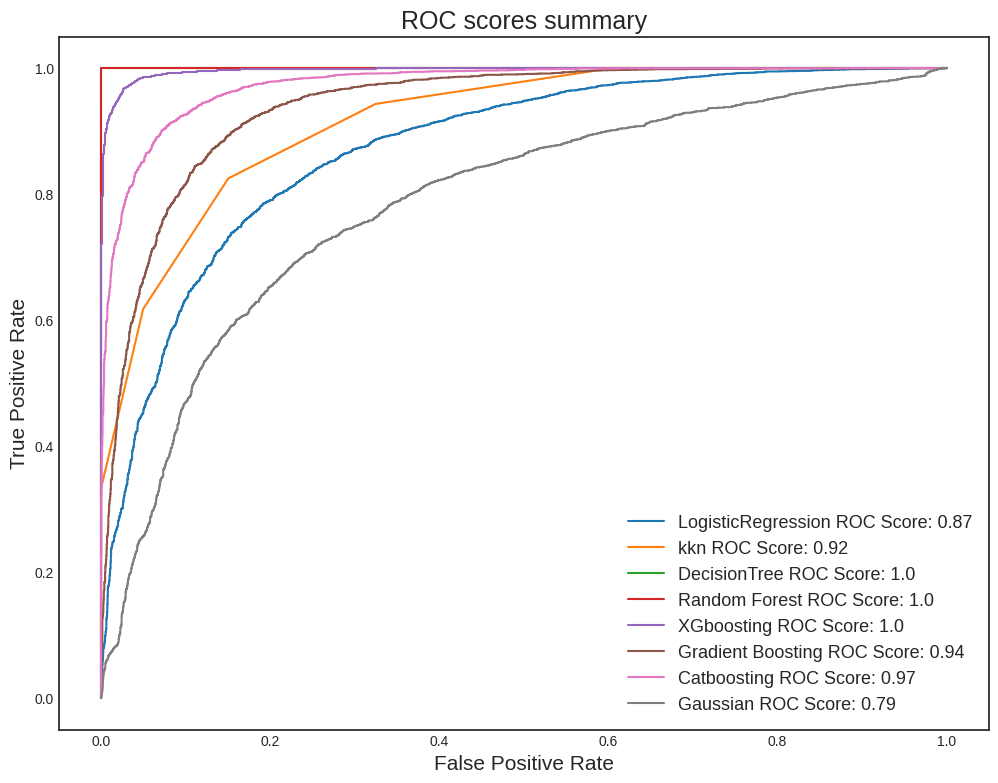

In [ ]:
roc_summary_plot(y_train, [logreg_probat, kkn_probat, dectree_probat, rf_probat,xg_probat, gb_probat, cat_probat, mb_probat],
                         ["LogisticRegression", "kkn", "DecisionTree" ,"Random Forest", "XGboosting","Gradient Boosting", "Catboosting", "Gaussian"])

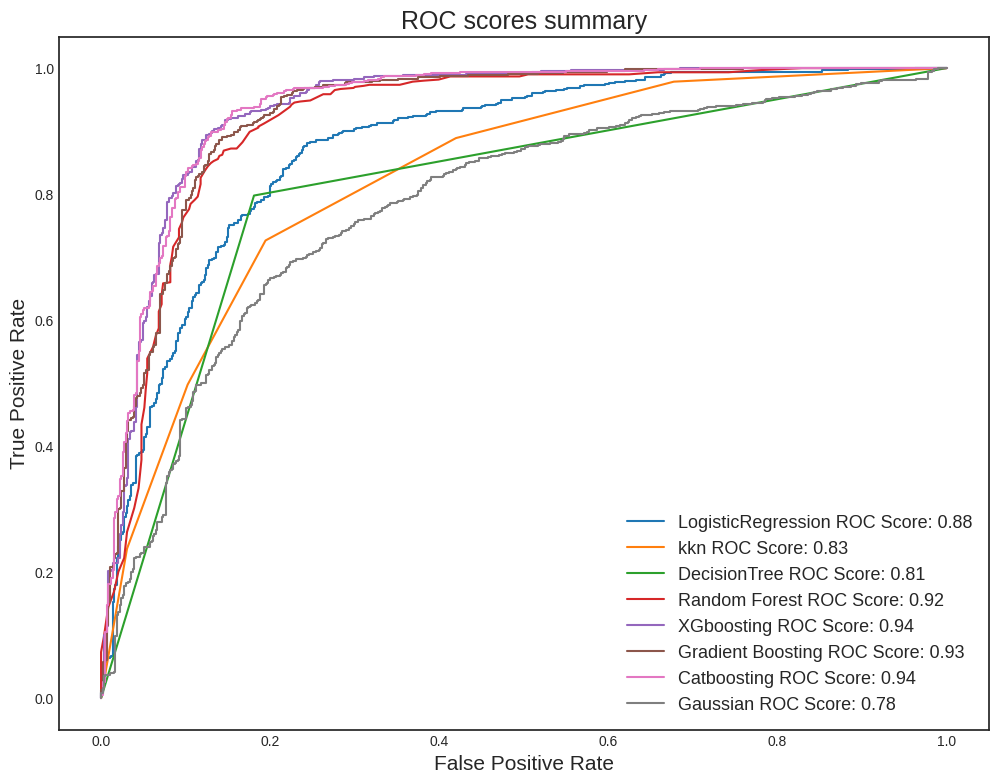

In [ ]:
roc_summary_plot(y_test, [logreg_proba, kkn_proba, dectree_proba, rf_proba,xg_proba, gb_proba, cat_proba, mb_proba],
                         ["LogisticRegression", "kkn", "DecisionTree" ,"Random Forest", "XGboosting","Gradient Boosting", "Catboosting", "Gaussian"])

In [ ]:
score1=metrics_scoring_table(logreg_predb,y_test, logreg_proba, "LogisticRegression")
score2=metrics_scoring_table(kkn_predb,y_test, kkn_proba, "KKN")
score3=metrics_scoring_table(dectree_predb,y_test, dectree_proba, "Decision Tree")
score4=metrics_scoring_table(rf_predb,y_test, rf_proba, "Random Forest")
score5=metrics_scoring_table(xg_predb,y_test, xg_proba, "Decision")
score6=metrics_scoring_table(gb_predb,y_test, gb_proba, "Gradient Boosting")
score7=metrics_scoring_table(cat_predb,y_test, cat_proba, "Catboosting")
score8=metrics_scoring_table(mb_predb,y_test, mb_proba, "Gaussian")
score = pd.concat([score1,score2,score3,score4, score4,score5, score6,score7,score8], axis=0)
score

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression,0.798150,0.815652,0.777778,0.796265,0.876086
0,KKN,0.765349,0.793478,0.726368,0.758442,0.827918
0,Decision Tree,0.808242,0.819421,0.797678,0.808403,0.808395
0,Random Forest,0.860387,0.863561,0.860697,0.862126,0.918411
0,Random Forest,0.860387,0.863561,0.860697,0.862126,0.918411
0,Decision,0.882254,0.880131,0.888889,0.884488,0.935853
0,Gradient Boosting,0.870479,0.869852,0.875622,0.872727,0.927496
0,Catboosting,0.881413,0.877451,0.890547,0.883951,0.937384
0,Gaussian,0.726661,0.727124,0.737977,0.732510,0.783925


Berdasarkan hasil pemodelan, model yang dipilih untuk di tuning adalah **Decision Tree**, **Catboosting** dan **Gradient Boosting** karena :

- **Berdasarkan model definition, saya akan memprioritaskan metric F1-Score dan ROC-AUC** (dengan prioritas utama roc-auc). Jika diliat pada tabel diatas, **Decision Tree**, **Catboosting** dan **Gradient Boosting** memiliki 3 nilai ROC-AUC tertinggi. Selain itu juga ketiga model tersebut memiliki akurasi dan AUC Score yang cukup tinggi dibandingkan model lainnya. Oleh karena itu model ini dipilih
- Secara bisnis, **Model Catboosting** dapat mengklasifikasikan kelas *subscribtion** lebih baik dari pada model lainnya (meskipun masih ada beberapa kelemahan tapi model ini lebih baik dari model lainnya)

### 9-2 Tuning Model Selection

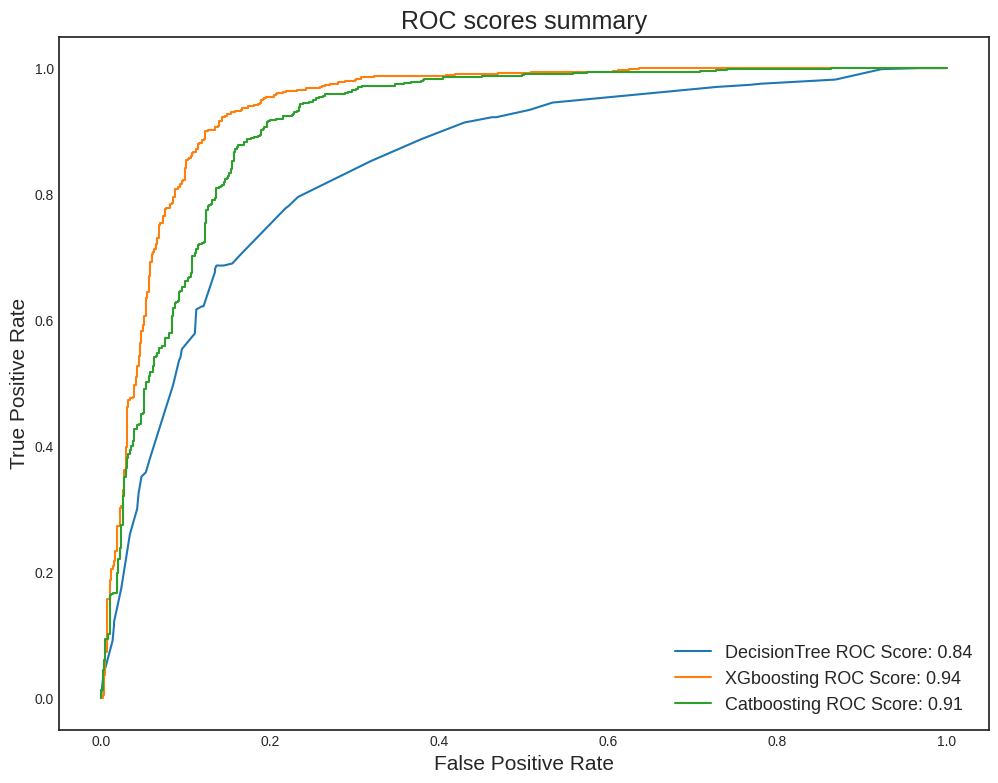

In [ ]:
roc_summary_plot(y_test, [dectree_probah, xg_probah, cat_probah],
                         ["DecisionTree" , "XGboosting", "Catboosting"])

In [ ]:
score1=metrics_scoring_table(dectree_predb,y_test, dectree_proba, "Decision Tree")
score2=metrics_scoring_table(xg_predb,y_test, xg_proba, "XG Boosting")
score3=metrics_scoring_table(cat_predb,y_test, cat_proba, "Catboosting")
score = pd.concat([score1,score2,score3], axis=0)
score

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree,0.808242,0.819421,0.797678,0.808403,0.808395
0,XG Boosting,0.882254,0.880131,0.888889,0.884488,0.935853
0,Catboosting,0.881413,0.877451,0.890547,0.883951,0.937384


Dari informasi diatas dapat disimpulkan bahwa :
- Meskipun masih belum bisa mengklasifikasikan kelas *subscribe* dengan baik akan tetapi model ini secara *overall* lebih baik dari pada *XGboosting* (FP dan FN lebih rendah)

## 9-3 Best Model Selection

##### Analysis FP FN

In [ ]:
#variabel Act vs Pred
act_pred_seq = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(xg_predbh)
})
df_act_pred_seq = pd.concat([X_test, act_pred_seq],axis=1)

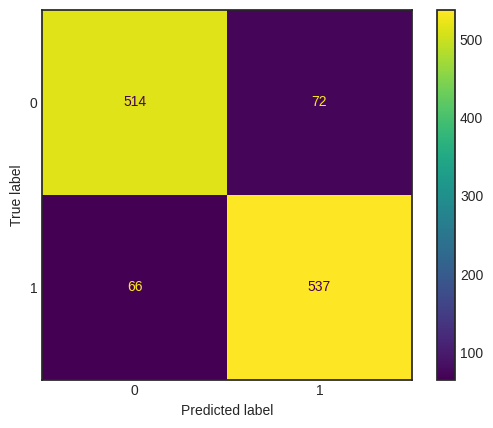

In [ ]:
# Confusion Matrix
cm_test_seq = confusion_matrix(y_test, xg_predbh)
ConfusionMatrixDisplay(cm_test_seq).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- Model XGboosting sama-sama dapat memprediksi ke kelas **subscribe** dan **not subscribe**. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class no subscribe(66 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class subscribe*. Sedangkan prediksi *class subscribe* hanya ada sedikit kesalahan (72 kesalahan). Kesalahan ini diprediksi seabgai kelas *not subscribe*

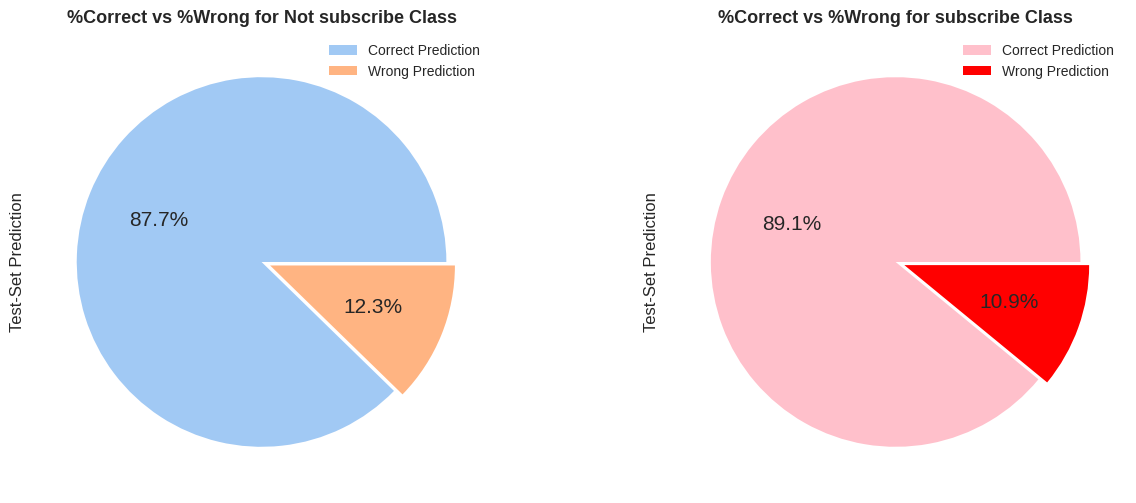

In [ ]:
#Pembuatan Pie Chart
fig, ax =plt.subplots(1,2,figsize=(15,6))

act_pred_seq[act_pred_seq['actual']==0]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = sns.color_palette('pastel')[0:2], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[0])
ax[0].set_title('%Correct vs %Wrong for Not subscribe Class', fontsize=13, fontweight='bold')
ax[0].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[0].legend(labels=['Correct Prediction', 'Wrong Prediction'])

act_pred_seq[act_pred_seq['actual']==1]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['pink', 'red'], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[1])
ax[1].set_title('%Correct vs %Wrong for subscribe Class', fontsize=13, fontweight='bold')
ax[1].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[1].legend(labels=['Correct Prediction', 'Wrong Prediction'])


plt.show()


Dari informasi diatas dapat disimpulkan bahwa (*business insight*):

1. Model cenderung memprediksi ke-arah *not subscribe* karena kesalahan pada kelas *non subscribe* lebih besar dari pada kelas tidak *subscribe* (2%)
2. Terdapat potensi kehilangan *klien* karena salah klasifikasi *subscribe* ke kelas tidak *not subscribe* sebesar 10.9%
3. Terdapat potensi *loss* akibat *marketing cost* yang seharusnya tidak dibutuhkan karena salah klasifikasi *customer* ke kelas *churn* sebesar ~10%

In [ ]:
# Karakteristik True Negative

df_act_pred_seq[(df_act_pred_seq['actual']==0) &(df_act_pred_seq['prediction']==0)].describe()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,last_contact_day,actual,prediction
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.0,514.0
mean,41.023346,1.490272,0.025292,766.132296,0.640078,0.178988,180.928016,2.429961,22.872387,0.337027,170.138132,0.0,0.0
std,9.677219,0.717983,0.157163,1103.805455,0.480445,0.383716,119.812527,1.548425,59.242726,0.887483,71.086927,0.0,0.0
min,22.000000,0.000000,0.000000,-1083.000000,0.000000,0.000000,5.000000,1.000000,-1.000000,0.000000,28.000000,0.0,0.0
25%,33.000000,1.000000,0.000000,46.750000,0.000000,0.000000,90.000000,1.000000,-1.000000,0.000000,133.000000,0.0,0.0
50%,40.000000,2.000000,0.000000,352.500000,1.000000,0.000000,150.500000,2.000000,-1.000000,0.000000,154.000000,0.0,0.0
75%,49.000000,2.000000,0.000000,1065.750000,1.000000,0.000000,247.000000,3.000000,-1.000000,0.000000,211.000000,0.0,0.0
max,67.000000,2.000000,1.000000,3879.500000,1.000000,1.000000,586.000000,6.000000,175.800116,3.328003,325.000000,0.0,0.0


In [ ]:
# Karakteristik True Negative
df_act_pred_seq[(df_act_pred_seq['actual']==0) &(df_act_pred_seq['prediction']==0)].describe(include='object')

,job,education
count,514,514
unique,12,4
top,blue-collar,secondary
freq,147,268


In [ ]:
# Karakteristik False Negative

df_act_pred_seq[(df_act_pred_seq['actual']==0) &(df_act_pred_seq['prediction']==1)].describe()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,last_contact_day,actual,prediction
count,72.000000,72.000000,72.0,72.000000,72.00000,72.000000,72.00000,72.000000,72.000000,72.000000,72.000000,72.0,72.0
mean,42.083333,1.583333,0.0,1354.069444,0.37500,0.166667,580.93750,2.027778,21.138897,0.365445,190.166667,0.0,1.0
std,12.574006,0.550288,0.0,1425.584694,0.48752,0.375293,293.55527,1.221546,53.135489,0.916875,76.328423,0.0,0.0
min,24.000000,0.000000,0.0,-202.000000,0.00000,0.000000,106.00000,1.000000,-1.000000,0.000000,36.000000,0.0,1.0
25%,31.000000,1.000000,0.0,207.750000,0.00000,0.000000,402.50000,1.000000,-1.000000,0.000000,133.750000,0.0,1.0
50%,39.000000,2.000000,0.0,789.500000,0.00000,0.000000,562.50000,2.000000,-1.000000,0.000000,172.000000,0.0,1.0
75%,51.250000,2.000000,0.0,2285.000000,1.00000,0.000000,756.50000,3.000000,-1.000000,0.000000,231.250000,0.0,1.0
max,72.000000,2.000000,0.0,3879.500000,1.00000,1.000000,1222.50000,6.000000,175.800116,3.328003,358.000000,0.0,1.0


In [ ]:
# Karakteristik False Negative
df_act_pred_seq[(df_act_pred_seq['actual']==0) &(df_act_pred_seq['prediction']==1)].describe(include='object')

,job,education
count,72,72
unique,11,4
top,management,secondary
freq,17,35


Dari informasi diatas dapat disimpulkan bahwa (*business insight*) :

1. Kemungkinan *client* salah di-prediksi, karena bekerja di bagian management, blue collar dan yang memiliki level pendidikan `secondary`
2. *Client* yang salah di-prediksi memiliki beberapa karakteristik *client* yang *not subscribe* seperti umur yang terlalu tua,memiliki balance yang tinggi, dan durasi pamasaran yang relatif rendah.



## 10- Model Saving

In [ ]:
# Save the Files

# Save logreg
logreg_pipelineb = logreg_pipelineb
joblib.dump(logreg_pipelineb, 'logreg_pipelineb.pkl')

['logreg_pipelineb.pkl']

In [ ]:
# Save the Files

# Save logreg
xg_pipelineb = xg_pipelineb
joblib.dump(xg_pipelineb, 'xg_pipelineb.pkl')

['xg_pipelineb.pkl']

In [ ]:
# Save the Files

# Save logreg
xg_tuning = xg_grid_search.best_estimator_
joblib.dump(xg_tuning, 'xg_tuning.pkl')

['xg_tuning.pkl']

In [ ]:
# Save the Files

# Save logreg
xg_params = xg_grid_search.best_params_
joblib.dump(xg_params, 'xg_params.pkl')

['xg_params.pkl']

## 11-Model Inference

Model inference dikerjakan dinotebook [P2FP_desti_ratna_komala_inference.ipynb](https://github.com/destiratnakomala/Final-Project-FTDS-020/blob/main/Bank-Marketing-Term-Deposit/P2FP_inference_desti_ratna_komala.ipynb)

## 12-Kesimpulan

**Berdasarkan pemodelan** yang telah dilakukan, model tuning XGBoosting merupakan model terbaik dalam memprediksi apakah customer akan berlangganan deposito berjangka atau tidak. Dengan tingkat akurasi hingga 88%, tingkat klasifikasi sebesar 89% dan tingkat kesalahan prediksi yang sangat rendah sebesar 7%.

**Berdasarkan fiturnya**, klien yang memiliki cicilan rumah (**housing loan**) dan hutang pribadi(**personal loan**) menjadi indikator paling penting apakah seorang klien akan berlangganan deposito berjangka atau tidak.
Selain itu, pekerjaan **jobs**, status pernikahan **marital** dan durasi tim marketing memasarkan produk bank kepada klien **duration** menjadi faktor penting dalam menentukan apakah seorang klien akan berlangganan deposito berjangka atau tidak.


**Rekomendasi Strategi Pemasaran:**

- Melakukan Survei Target
    
  Menanyakan secara langsung/melakukan survei mendalam kepada klien yang telah bergabung dan yang akan bergabung dengan bank Anda. Berikan hadiah/kartu voucher sebagai reward telah mengisi survei dengan lengkap. Pastikan seluruh klien mengisi alasan mereka bergabung dengan bank Anda dan alasan mengapa mereka meninggalkan bank mereka sebelumnya. Berdasarkan hal tersebut, buatlah strategi bisnis yang sesuai dengan kebutuhan klien.

- Memberikan Penawaran sesuai data demografik

  Menggunakan informasi publik seperti tren produk, pendapatan per demografik, dan tingkat konsumerisasi pada lingkungan tersebut. Tawarkan produk-produk yang sedang trending pada klien dengan tingkat konsumerisasi yang tinggi. Untuk klien yang sudah berkeluarga, tawarkan bonus-bonus yang berhubungan dengan produk rumah tangga. Target utama pemasaran sebaiknya untuk klien dengan nilai `balance` yang tinggi. Karena semakin besar saldo yang dimiliki klien, semakin besar kemungkinan klien tersebut akan berlangganan deposito berjangka.

- Tingkatkan Kualitas Customer Service

  Customer service merupakan wajah yang mencerminkan kualitas suatu bank. Kehilangan klien akan lebih mahal ketimbang mempertahankan klien, oleh karena itu pemberian pelayanan terbaik dari pihak bank sangat perlu diutamakan. Buatlah strategi bagaimana supaya orang-orang yang sudah menjadi klien dapat tetap bertahan dan setia dengan bank Anda. Variasikan layanan yang ditawarkan kepada klien. Pastikan selalu mengecek perkembangan klien Anda dan berikan solusi yang menguntungkan kedua belah pihak jika klien tersebut memiliki masalah finansial.

- Taktik lainnya:
  - Bekerjasama dengan perusahaan/bank lain
  - Pemasaran sebaiknya dilakukan berdasarkan perilaku belanja klien
  - Lakukan pemasaran melalui medio online/onsite/via telepon
  - Highlight cerita-certa sukses klien
  





